# Impacto de la deforestación en el regimen de caudales de los rios en Colombia (TEAM 28)

## Multivariate time series forecasting - VAR model

### Libraries

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


### Read data

In [7]:
macrodata = pd.read_csv('../../DS4All_2020_Team28_Project/data/matrix/matrix_consol_v2.zip')

macrodata.head(10)

date  year  month  mc  v_flow_mean  v_loss_cover  v_rainfall_total  \
0  2000-01  2000      1   7        230.4      0.000000             334.0   
1  2000-02  2000      2   7        272.4      0.000133             400.0   
2  2000-03  2000      3   7        321.6      0.000265             319.0   
3  2000-04  2000      4   7        310.8      0.000398             248.0   
4  2000-05  2000      5   7        410.0      0.000531             302.0   
5  2000-06  2000      6   7        295.9      0.000663              81.0   
6  2000-07  2000      7   7        244.2      0.000796              96.0   
7  2000-08  2000      8   7        255.0      0.000928              64.0   
8  2000-09  2000      9   7        233.8      0.001061             262.0   
9  2000-10  2000     10   7        216.0      0.001194             141.0   

   v_temperature_mean  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9                 NaN

In [9]:
mcs = data['mc'].unique()
mcs.sort()

print(mcs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


# All basins

In [13]:
from numpy import mean 
from numpy import std
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc# show inverted results in a dataframe


 ################ Basin 1 ############### 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jul, 2020
Time:                     21:48:53
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.39517
Nobs:                     215.000    HQIC:                  -9.43224
Log likelihood:           285.335    FPE:                4.00662e-05
AIC:                     -10.1354    Det(Omega_mle):     2.48824e-05
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.109740         0.193566           -0.567           0.571
L1.v_flow_mean              -0.710282         0.072627           -9.7

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


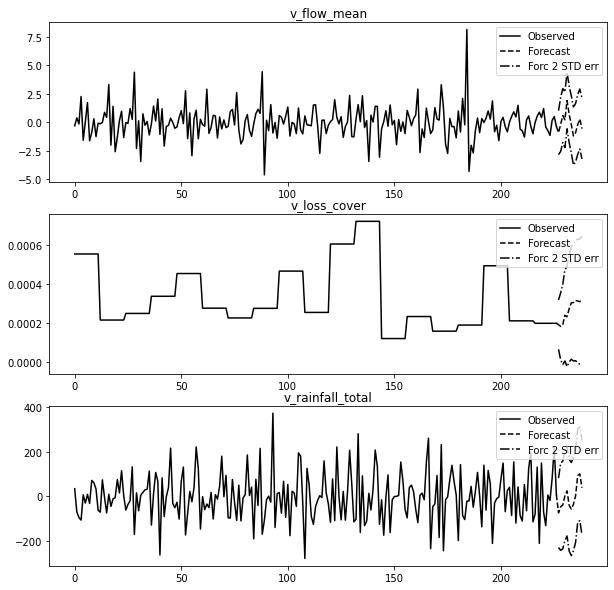

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.995845      0.004108          0.000046
2       0.994834      0.004743          0.000423
3       0.980330      0.010647          0.009023
4       0.961283      0.022299          0.016418

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.006118      0.993882          0.000000
1       0.008176      0.990718          0.001106
2       0.007229      0.972034          0.020737
3       0.011571      0.949855          0.038574
4       0.011932      0.942725          0.045344

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.003235      0.000133          0.996633
1       0.015597      0.002384          0.982019
2       0.023385      0.003544          0.973071
3       0.040100      0.019386          0.940514
4       0.039848      0.021184          0.938969


None
Bias: 0.007530
Mean absolute error: 0.32

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


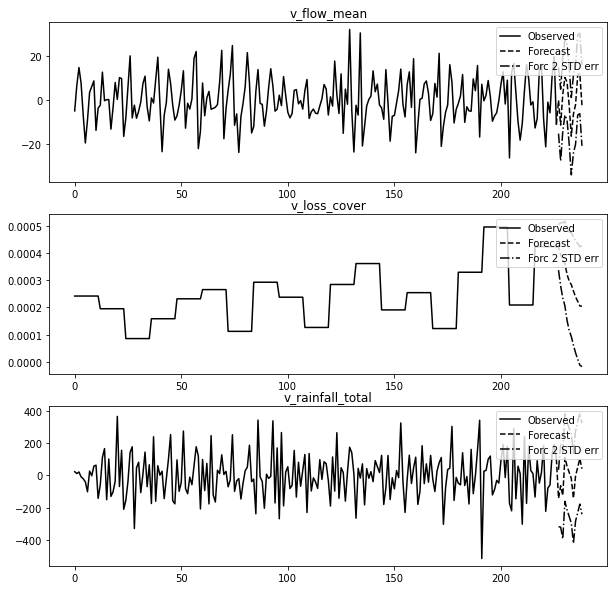

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.969105      0.013401          0.017495
2       0.965318      0.013024          0.021657
3       0.965982      0.012813          0.021205
4       0.959892      0.017345          0.022763

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000923      0.999077          0.000000
1       0.002323      0.990521          0.007156
2       0.006625      0.987842          0.005533
3       0.007020      0.988356          0.004624
4       0.008757      0.985128          0.006115

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.036650      0.019044          0.944306
1       0.106339      0.018164          0.875498
2       0.185710      0.019703          0.794587
3       0.191815      0.023508          0.784677
4       0.194758      0.023477          0.781766


None
Bias: -3.442778
Mean absolute error: 8.8

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


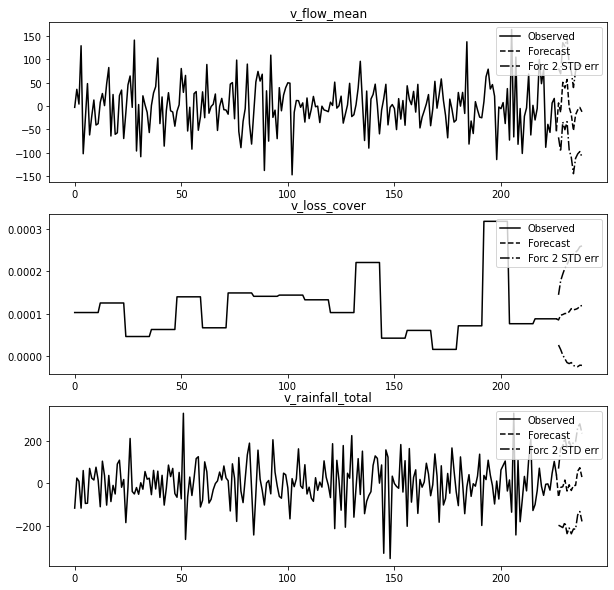

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.996272      0.003361          0.000366
2       0.956536      0.039121          0.004344
3       0.954997      0.035317          0.009686
4       0.940192      0.050305          0.009503

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000685      0.999315          0.000000
1       0.000673      0.990147          0.009180
2       0.001112      0.987270          0.011619
3       0.000945      0.978155          0.020901
4       0.000812      0.974968          0.024220

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.006855      0.012434          0.980711
1       0.108837      0.023063          0.868100
2       0.170326      0.037262          0.792412
3       0.182424      0.074446          0.743130
4       0.185011      0.074438          0.740551


None
Bias: 2.198884
Mean absolute error: 22.4

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


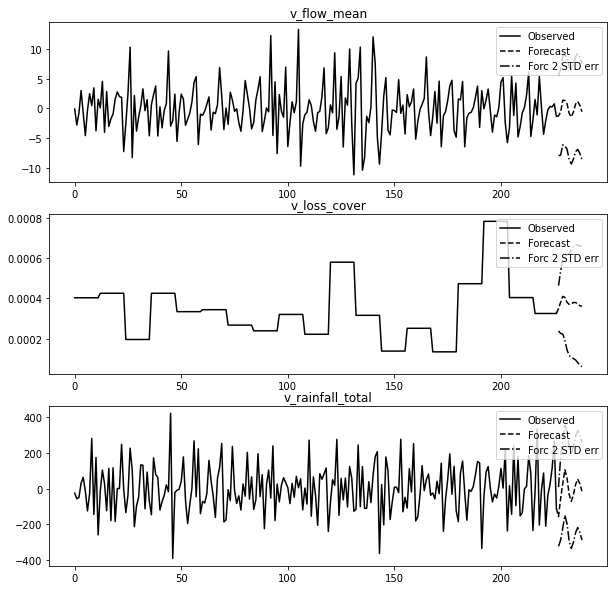

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999696      0.000255          0.000049
2       0.990628      0.004596          0.004776
3       0.989361      0.005161          0.005478
4       0.982172      0.006691          0.011137

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.009764      0.990236          0.000000
1       0.026189      0.973810          0.000001
2       0.031448      0.965519          0.003033
3       0.026059      0.965824          0.008117
4       0.021598      0.957621          0.020780

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.009268      0.031503          0.959229
1       0.233173      0.021646          0.745182
2       0.330872      0.018859          0.650269
3       0.338992      0.027930          0.633078
4       0.340156      0.033686          0.626158


None
Bias: 0.867813
Mean absolute error: 1.52

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


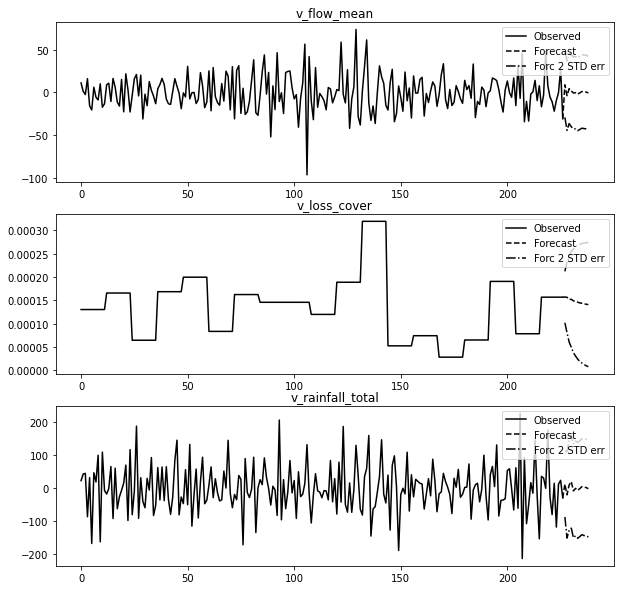

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.981611      0.001120          0.017270
2       0.975786      0.004993          0.019221
3       0.960267      0.007307          0.032426
4       0.954231      0.007368          0.038401

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001152      0.998848          0.000000
1       0.000850      0.998214          0.000936
2       0.000818      0.998136          0.001046
3       0.000677      0.998310          0.001013
4       0.000646      0.997902          0.001453

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.016427      0.007658          0.975915
1       0.163008      0.017703          0.819288
2       0.204664      0.028431          0.766905
3       0.232439      0.049258          0.718303
4       0.237569      0.049589          0.712842


None
Bias: -6.959082
Mean absolute error: 15.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


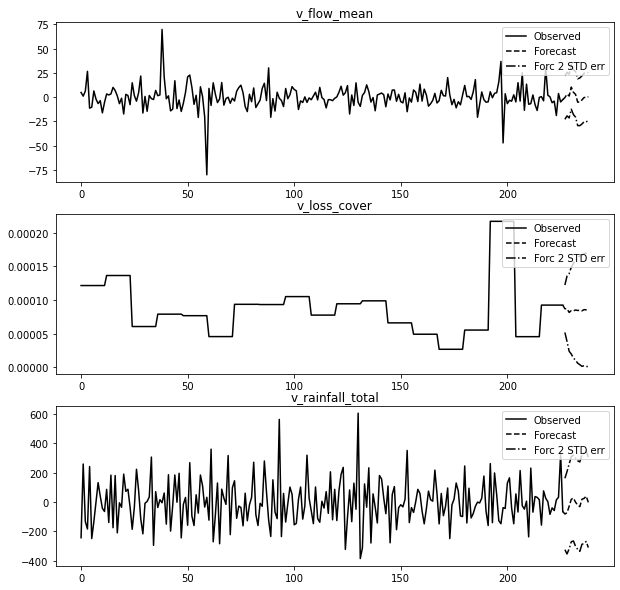

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999680      0.000316          0.000004
2       0.985535      0.011182          0.003283
3       0.983189      0.011840          0.004971
4       0.976092      0.018816          0.005092

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000001      0.999999          0.000000
1       0.001232      0.998474          0.000294
2       0.000941      0.997570          0.001489
3       0.000867      0.997572          0.001560
4       0.001558      0.996137          0.002305

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001583      0.008364          0.990052
1       0.001211      0.008270          0.990520
2       0.040330      0.007947          0.951723
3       0.040499      0.008623          0.950877
4       0.049789      0.010011          0.940199


None
Bias: -3.536117
Mean absolute error: 8.0

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


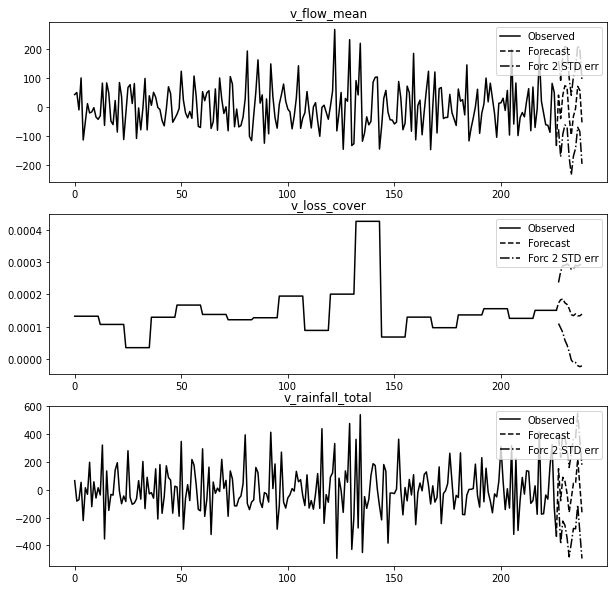

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.996448      0.001031          0.002521
2       0.967798      0.029584          0.002618
3       0.967102      0.030164          0.002733
4       0.959604      0.037362          0.003034

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.011948      0.988052          0.000000
1       0.007804      0.972534          0.019662
2       0.012282      0.962139          0.025579
3       0.014245      0.961297          0.024457
4       0.015428      0.963025          0.021547

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.279407      0.004274          0.716319
1       0.324017      0.010201          0.665783
2       0.316344      0.033729          0.649927
3       0.312292      0.036874          0.650834
4       0.313984      0.036510          0.649506


None
Bias: -10.013898
Mean absolute error: 48

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


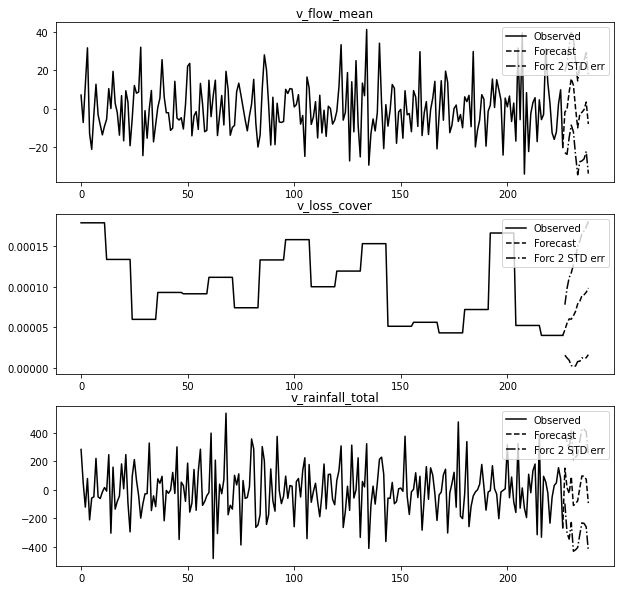

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.992175      0.000390          0.007435
2       0.981356      0.009579          0.009066
3       0.974546      0.016279          0.009175
4       0.965954      0.024106          0.009940

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.009111      0.990889          0.000000
1       0.006010      0.993674          0.000316
2       0.009144      0.989762          0.001094
3       0.011276      0.983906          0.004818
4       0.019314      0.975303          0.005384

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.151899      0.000021          0.848080
1       0.138794      0.000219          0.860986
2       0.142055      0.002182          0.855763
3       0.142477      0.002463          0.855060
4       0.143764      0.003150          0.853085


None
Bias: 2.266667
Mean absolute error: 6.93

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jul, 2020
Time:                     21:49:01
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -10.8295
Nobs:                     216.000    HQIC:                  -11.7794
Log likelihood:           524.250    FPE:                4.05549e-06
AIC:                     -12.4234    Det(Omega_mle):     2.61568e-06
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.187766         1.053694           -0.178           0.859
L1.v_flow_mean              -0.744119         0.090844           -8.191           0.000
L1.v_loss_cover          7

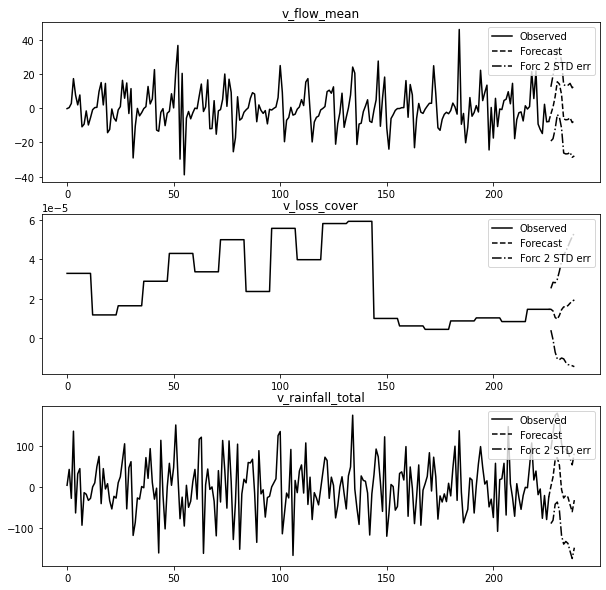

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.940844      0.002260          0.056896
2       0.917093      0.002206          0.080701
3       0.908451      0.011756          0.079793
4       0.897995      0.016814          0.085191

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000316      0.999684          0.000000
1       0.000887      0.999111          0.000001
2       0.001100      0.998853          0.000048
3       0.001676      0.995380          0.002944
4       0.002177      0.987628          0.010195

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.363630      0.000452          0.635919
1       0.367584      0.001602          0.630814
2       0.373409      0.001686          0.624905
3       0.373693      0.002185          0.624123
4       0.361167      0.032271          0.606561


None
Bias: 5.235845
Mean absolute error: 6.35

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


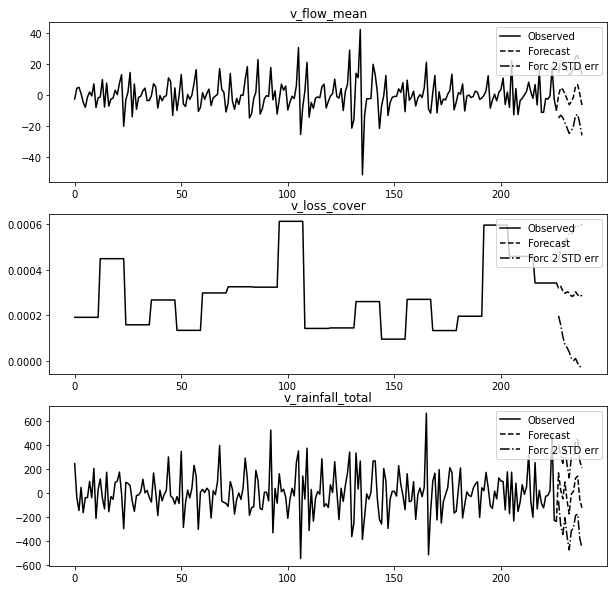

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.951497      0.001896          0.046606
2       0.925698      0.010809          0.063493
3       0.915529      0.012204          0.072267
4       0.914454      0.012858          0.072688

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000712      0.999288          0.000000
1       0.000956      0.998031          0.001014
2       0.001093      0.997891          0.001016
3       0.002887      0.995560          0.001553
4       0.002889      0.995775          0.001336

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.620933      0.009579          0.369488
1       0.644632      0.017278          0.338090
2       0.637051      0.021282          0.341667
3       0.633186      0.022435          0.344380
4       0.631874      0.023138          0.344988


None
Bias: 1.186538
Mean absolute error: 4.67

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


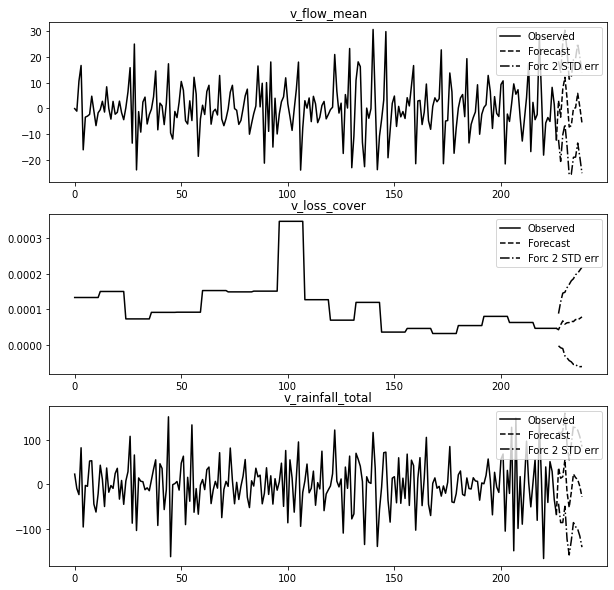

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.989430      0.000289          0.010280
2       0.979008      0.006350          0.014642
3       0.948364      0.029553          0.022084
4       0.924830      0.039844          0.035325

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000227      0.999773          0.000000
1       0.000473      0.999163          0.000365
2       0.002249      0.997467          0.000285
3       0.003236      0.992860          0.003904
4       0.004715      0.987179          0.008105

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.468753      0.003627          0.527620
1       0.435657      0.003530          0.560813
2       0.452822      0.016675          0.530503
3       0.439162      0.038715          0.522122
4       0.432188      0.059349          0.508463


None
Bias: 2.955249
Mean absolute error: 5.24

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


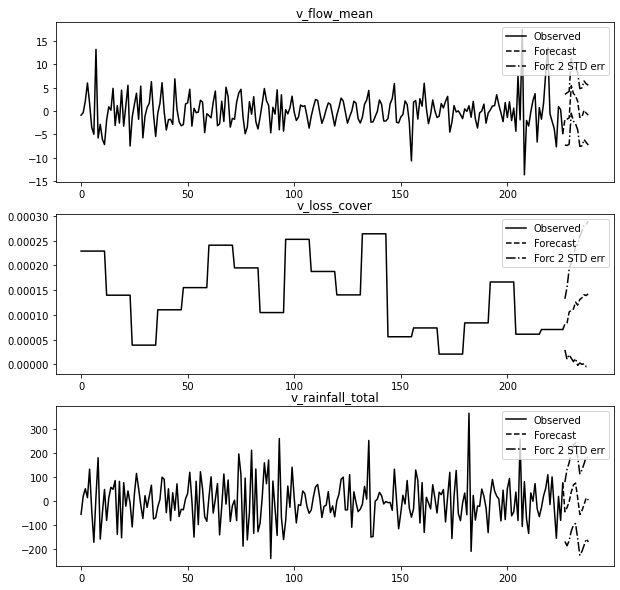

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.989940      0.008005          0.002055
2       0.983680      0.007951          0.008369
3       0.965984      0.020421          0.013595
4       0.963928      0.022229          0.013843

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.006021      0.993979          0.000000
1       0.009717      0.987184          0.003098
2       0.008385      0.986456          0.005159
3       0.008726      0.987193          0.004081
4       0.010382      0.985424          0.004194

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.008191      0.008233          0.983576
1       0.072850      0.014571          0.912579
2       0.110679      0.016132          0.873189
3       0.112659      0.016111          0.871230
4       0.108916      0.019344          0.871740


None
Bias: -1.275580
Mean absolute error: 18.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


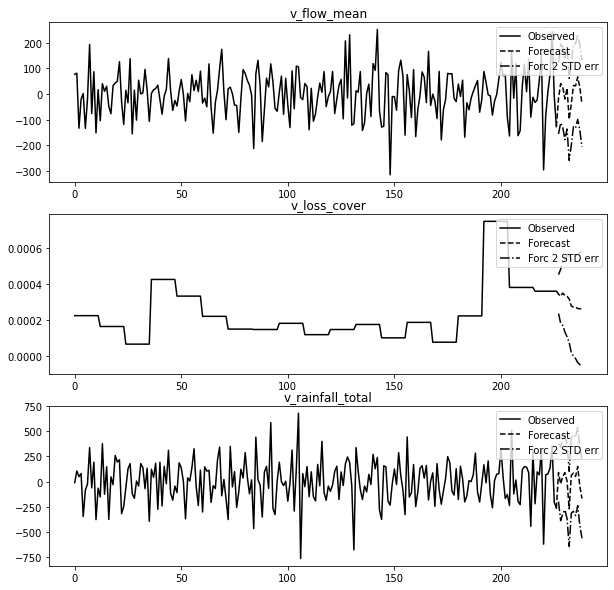

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.941327      0.000611          0.058062
2       0.936376      0.000743          0.062881
3       0.931498      0.002473          0.066029
4       0.925809      0.008621          0.065570

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.012204      0.987796          0.000000
1       0.006444      0.993111          0.000445
2       0.010923      0.986905          0.002172
3       0.017343      0.980939          0.001718
4       0.029671      0.968134          0.002195

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.436671      0.012147          0.551181
1       0.404577      0.015857          0.579566
2       0.412060      0.019628          0.568311
3       0.409341      0.023840          0.566819
4       0.406731      0.029880          0.563389


None
Bias: 62.464392
Mean absolute error: 68.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


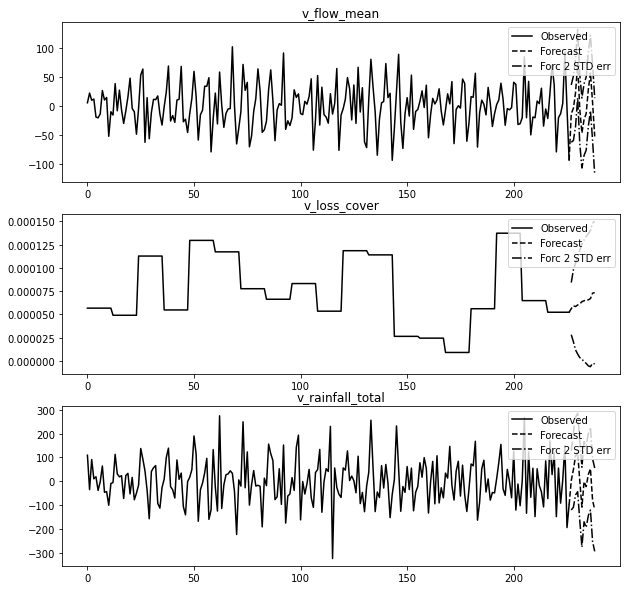

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.979039      0.004141          0.016820
2       0.948063      0.014433          0.037504
3       0.941587      0.014570          0.043843
4       0.929119      0.025108          0.045773

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000083      0.999917          0.000000
1       0.000061      0.998825          0.001115
2       0.002702      0.996367          0.000931
3       0.004103      0.995162          0.000735
4       0.003489      0.993773          0.002738

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.290968      0.000019          0.709013
1       0.324621      0.022335          0.653044
2       0.303708      0.082905          0.613388
3       0.311893      0.081856          0.606251
4       0.317531      0.084902          0.597567


None
Bias: 4.167549
Mean absolute error: 20.9

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


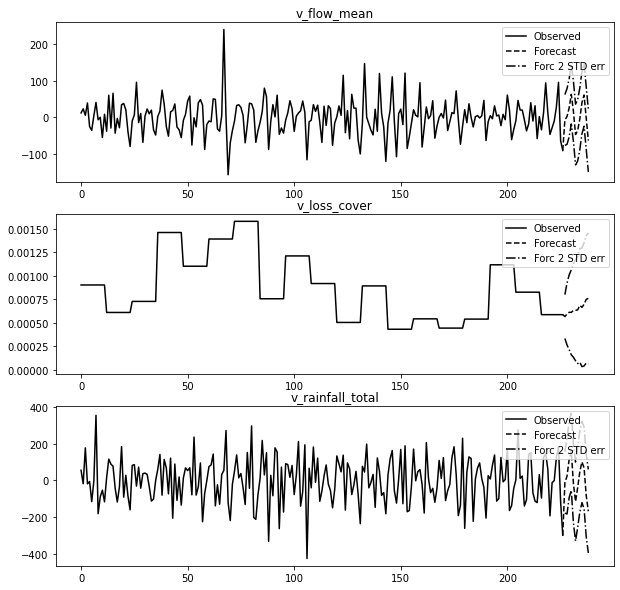

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.998990      0.000965          0.000045
2       0.998628      0.001148          0.000224
3       0.985558      0.005903          0.008538
4       0.951879      0.022844          0.025277

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.002022      0.997978          0.000000
1       0.001365      0.996159          0.002477
2       0.003395      0.990183          0.006422
3       0.003714      0.989166          0.007120
4       0.003662      0.990324          0.006014

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.097606      0.011883          0.890511
1       0.066871      0.013174          0.919955
2       0.086919      0.012951          0.900130
3       0.087562      0.018323          0.894116
4       0.084588      0.045734          0.869678


None
Bias: 16.813851
Mean absolute error: 21.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jul, 2020
Time:                     21:49:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    1.39889
Nobs:                     216.000    HQIC:                  0.448937
Log likelihood:          -796.413    FPE:                   0.829380
AIC:                    -0.194995    Det(Omega_mle):        0.534928
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.999152        41.702327            0.024           0.981
L1.v_flow_mean              -0.461512         0.072391           -6.375           0.000
L1.v_loss_cover         27

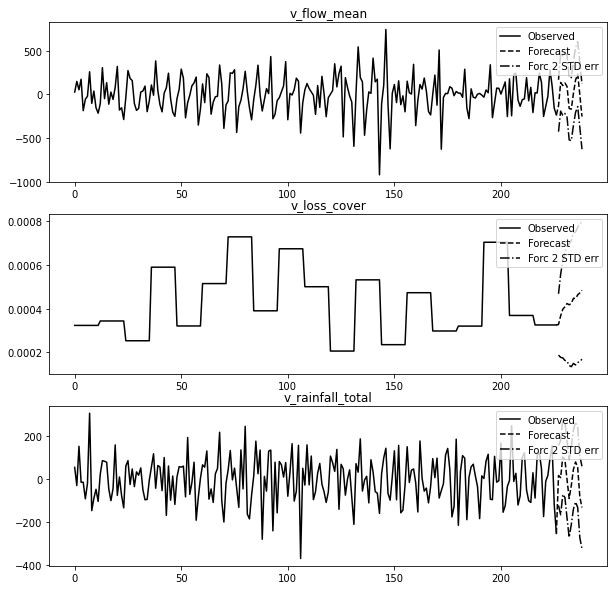

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.980161      0.015633          0.004206
2       0.942627      0.032012          0.025361
3       0.931146      0.044423          0.024431
4       0.918018      0.055838          0.026144

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000347      0.999653          0.000000
1       0.003189      0.994286          0.002526
2       0.002963      0.990616          0.006422
3       0.005348      0.986795          0.007857
4       0.009397      0.981533          0.009070

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.078467      0.013914          0.907619
1       0.057160      0.014233          0.928607
2       0.059940      0.014078          0.925983
3       0.060586      0.022215          0.917198
4       0.059355      0.044654          0.895990


None
Bias: 137.525380
Mean absolute error: 14

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


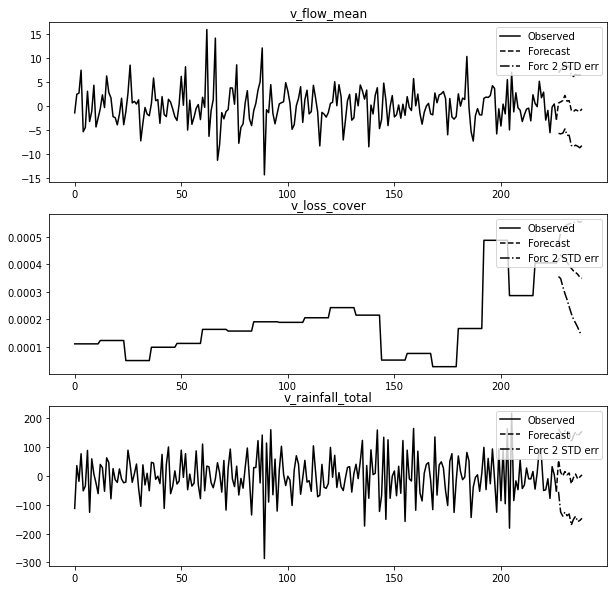

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.980991      0.011928          0.007081
2       0.968261      0.012319          0.019420
3       0.963592      0.016177          0.020230
4       0.933003      0.026280          0.040717

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.002178      0.997822          0.000000
1       0.001883      0.979628          0.018489
2       0.008561      0.935255          0.056184
3       0.010082      0.903745          0.086174
4       0.009917      0.880885          0.109197

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.348150      0.002408          0.649442
1       0.308170      0.026773          0.665057
2       0.303285      0.047248          0.649467
3       0.312399      0.046454          0.641147
4       0.311155      0.054507          0.634338


None
Bias: -0.625732
Mean absolute error: 1.8

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


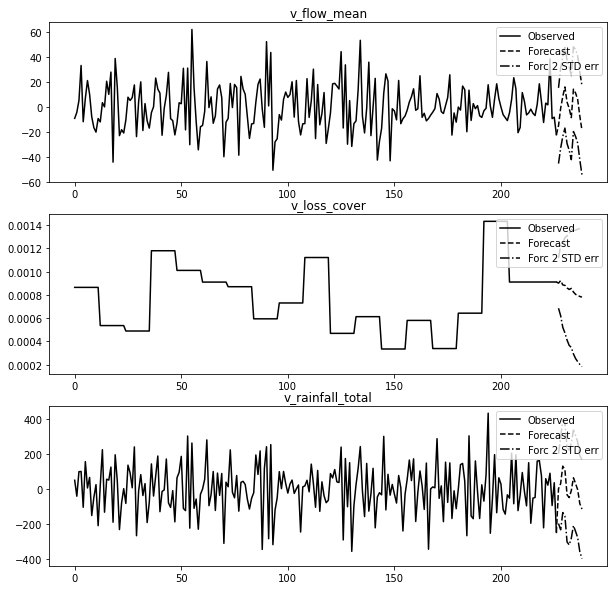

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999155      0.000265          0.000579
2       0.998763      0.000334          0.000903
3       0.992415      0.003632          0.003953
4       0.985094      0.006202          0.008705

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.009437      0.990563          0.000000
1       0.014654      0.984702          0.000645
2       0.023168      0.969902          0.006930
3       0.024662      0.968929          0.006409
4       0.028123      0.965873          0.006004

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.389104      0.000129          0.610767
1       0.374292      0.001480          0.624228
2       0.371199      0.011302          0.617499
3       0.375245      0.012883          0.611872
4       0.372684      0.014461          0.612855


None
Bias: 7.436974
Mean absolute error: 9.98

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


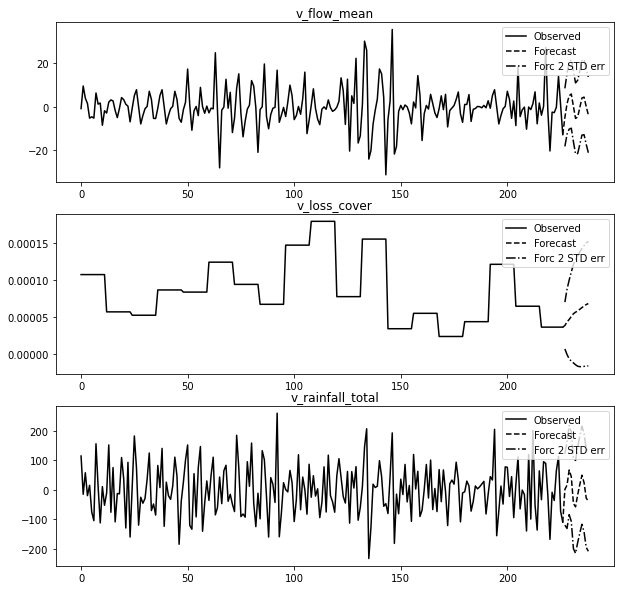

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.966304      0.006031          0.027665
2       0.960018      0.009307          0.030676
3       0.958466      0.011783          0.029751
4       0.923577      0.012456          0.063967

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001107      0.998893          0.000000
1       0.008342      0.990782          0.000876
2       0.005787      0.992600          0.001613
3       0.004511      0.993933          0.001556
4       0.004131      0.994559          0.001310

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.387013      0.001032          0.611956
1       0.342716      0.005646          0.651638
2       0.363066      0.015790          0.621144
3       0.367295      0.017245          0.615460
4       0.366980      0.016943          0.616077


None
Bias: 0.554376
Mean absolute error: 2.94

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


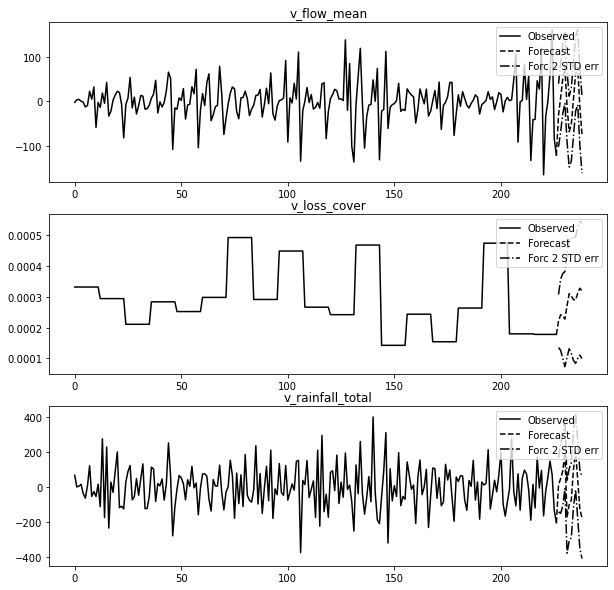

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.995980      0.000021          0.003999
2       0.995394      0.000036          0.004570
3       0.989439      0.000646          0.009915
4       0.988037      0.000807          0.011156

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001515      0.998485          0.000000
1       0.001772      0.996075          0.002153
2       0.007332      0.986286          0.006382
3       0.005898      0.986286          0.007817
4       0.008651      0.964392          0.026956

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.325893      0.026161          0.647946
1       0.257542      0.044597          0.697861
2       0.258683      0.051114          0.690203
3       0.262111      0.049752          0.688138
4       0.260629      0.052555          0.686816


None
Bias: 31.672478
Mean absolute error: 44.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


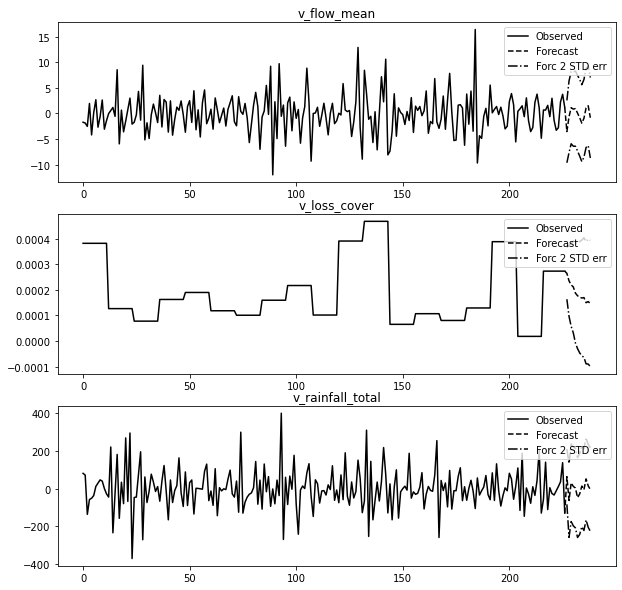

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.975049      0.007242          0.017709
2       0.972428      0.007686          0.019886
3       0.967709      0.009573          0.022718
4       0.955407      0.017179          0.027414

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.013987      0.986013          0.000000
1       0.018235      0.981376          0.000388
2       0.013759      0.985477          0.000765
3       0.012098      0.987237          0.000665
4       0.014087      0.984983          0.000931

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.039841      0.008975          0.951184
1       0.064604      0.016405          0.918991
2       0.139538      0.015350          0.845113
3       0.138846      0.028096          0.833057
4       0.136251      0.036390          0.827359


None
Bias: 0.076817
Mean absolute error: 1.14

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


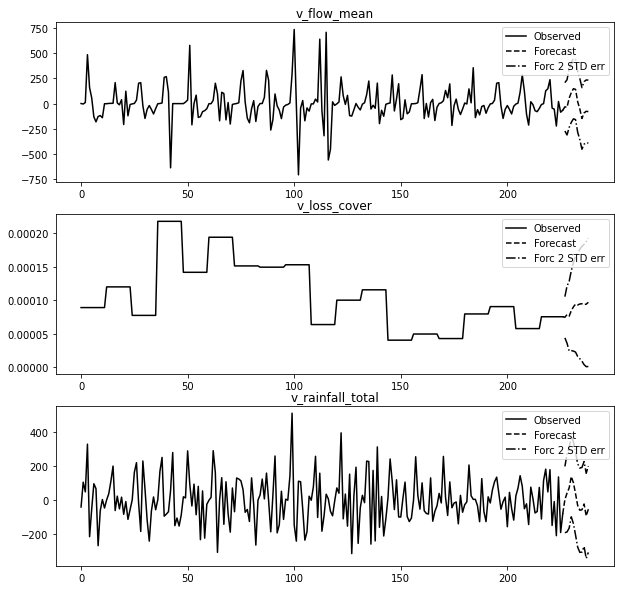

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.970826      0.001678          0.027496
2       0.969893      0.002916          0.027191
3       0.948542      0.002878          0.048580
4       0.934204      0.005011          0.060786

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000323      0.999677          0.000000
1       0.001247      0.997700          0.001053
2       0.000978      0.996745          0.002277
3       0.001378      0.996581          0.002041
4       0.003694      0.993319          0.002987

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.085717      0.000710          0.913573
1       0.146379      0.000750          0.852872
2       0.146174      0.004480          0.849346
3       0.147361      0.007385          0.845254
4       0.147327      0.026450          0.826222


None
Bias: 6.468705
Mean absolute error: 64.3

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jul, 2020
Time:                     21:49:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -2.43848
Nobs:                     216.000    HQIC:                  -3.38843
Log likelihood:          -381.978    FPE:                  0.0178734
AIC:                     -4.03236    Det(Omega_mle):       0.0115279
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.716112        16.222471            0.044           0.965
L1.v_flow_mean              -0.571167         0.075428           -7.572           0.000
L1.v_loss_cover         -2

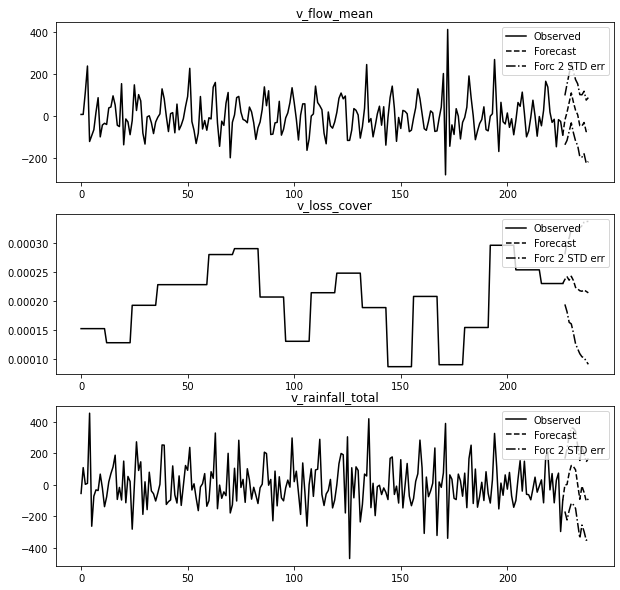

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.980504      0.000006          0.019491
2       0.968109      0.002073          0.029818
3       0.943870      0.022871          0.033259
4       0.905408      0.062705          0.031888

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000686      0.999314          0.000000
1       0.001491      0.993130          0.005379
2       0.007546      0.987664          0.004790
3       0.009431      0.983841          0.006728
4       0.010260      0.977296          0.012443

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.082999      0.001690          0.915312
1       0.108716      0.003443          0.887841
2       0.198333      0.009360          0.792307
3       0.198293      0.009314          0.792393
4       0.219877      0.011735          0.768388


None
Bias: 50.618726
Mean absolute error: 58.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


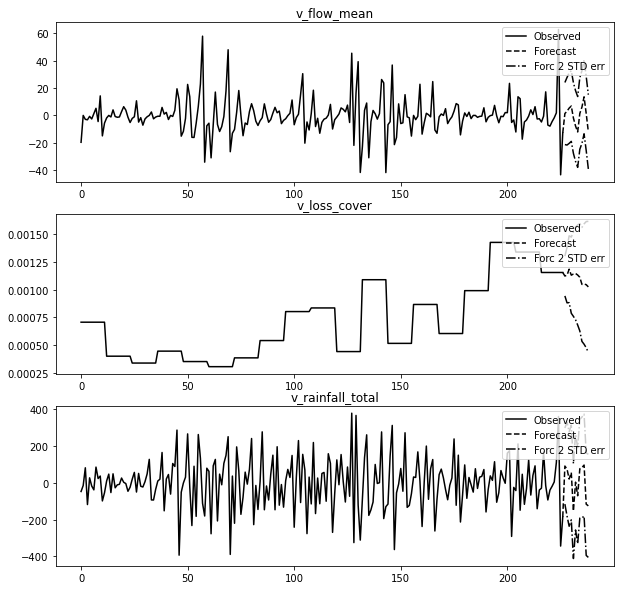

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.949741      0.000545          0.049714
2       0.936469      0.006935          0.056596
3       0.934915      0.007287          0.057798
4       0.931501      0.007983          0.060517

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000239      0.999761          0.000000
1       0.000511      0.998861          0.000628
2       0.000827      0.998533          0.000639
3       0.000637      0.996236          0.003127
4       0.000518      0.992631          0.006851

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.405361      0.000808          0.593831
1       0.413489      0.000701          0.585810
2       0.415529      0.001145          0.583326
3       0.415230      0.002887          0.581883
4       0.415749      0.006649          0.577602


None
Bias: 9.928640
Mean absolute error: 10.1

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


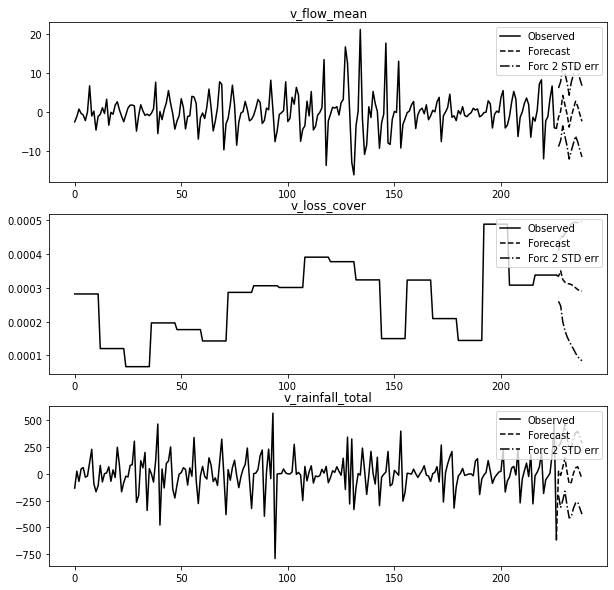

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.998541      0.000224          0.001235
2       0.993343      0.003597          0.003060
3       0.989848      0.007024          0.003128
4       0.983715      0.007739          0.008546

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000280      0.999720          0.000000
1       0.003235      0.996728          0.000037
2       0.003448      0.996494          0.000057
3       0.002658      0.993630          0.003712
4       0.002746      0.993578          0.003675

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.006675      0.000311          0.993014
1       0.181619      0.000237          0.818143
2       0.229560      0.001060          0.769379
3       0.239037      0.002824          0.758139
4       0.237926      0.021629          0.740445


None
Bias: 1.788689
Mean absolute error: 2.73

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


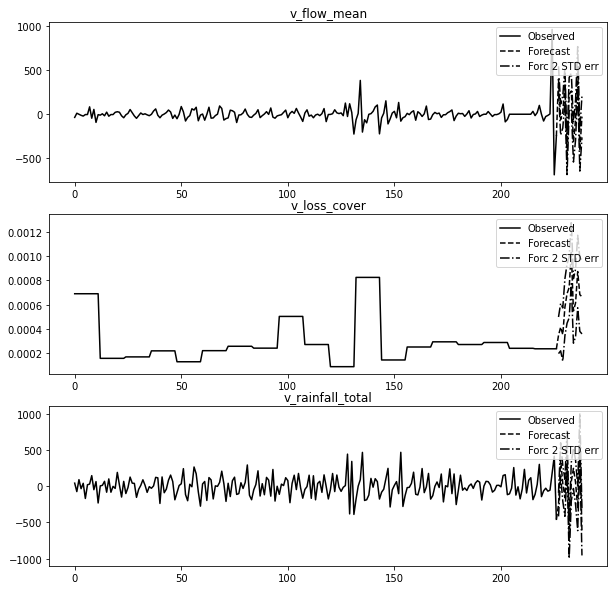

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.978772      0.010087          0.011140
2       0.961509      0.024147          0.014344
3       0.957911      0.022766          0.019323
4       0.954915      0.023691          0.021395

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.019850      0.980150          0.000000
1       0.038066      0.961911          0.000023
2       0.046866      0.953105          0.000030
3       0.044662      0.953535          0.001802
4       0.041676      0.956122          0.002202

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.038976      0.007072          0.953952
1       0.126917      0.004271          0.868812
2       0.230874      0.009051          0.760075
3       0.257389      0.037646          0.704965
4       0.284203      0.036250          0.679547


None
Bias: 468.451431
Mean absolute error: 46

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


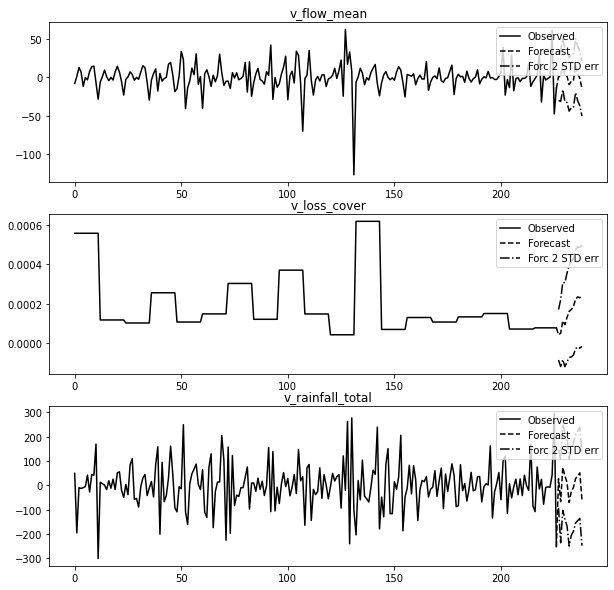

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.992608      0.006955          0.000438
2       0.986999      0.009305          0.003696
3       0.980686      0.011336          0.007978
4       0.977214      0.012858          0.009928

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.004761      0.995239          0.000000
1       0.026495      0.971172          0.002333
2       0.027546      0.966421          0.006033
3       0.029451      0.948351          0.022199
4       0.027765      0.945575          0.026660

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001152      0.005672          0.993176
1       0.232371      0.004798          0.762831
2       0.290972      0.008892          0.700136
3       0.291139      0.009236          0.699625
4       0.304007      0.009080          0.686913


None
Bias: 13.947728
Mean absolute error: 13.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


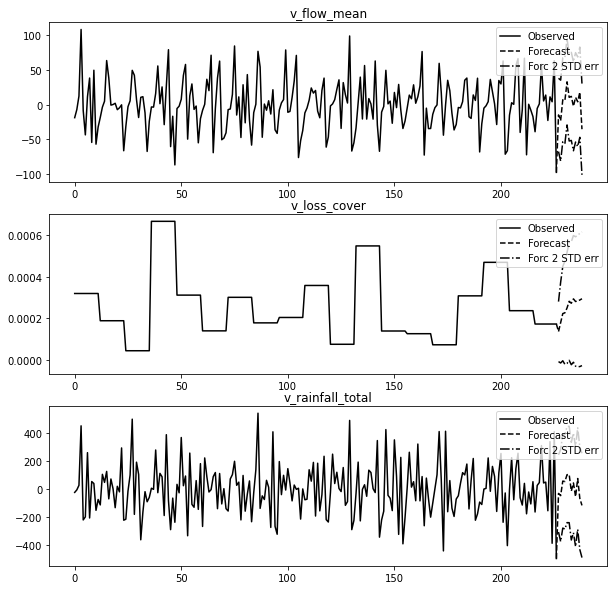

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999081      0.000869          0.000050
2       0.991474      0.000922          0.007604
3       0.986000      0.004153          0.009848
4       0.975474      0.006219          0.018307

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000162      0.999838          0.000000
1       0.004959      0.994880          0.000161
2       0.004699      0.989253          0.006049
3       0.004388      0.990061          0.005551
4       0.005442      0.980501          0.014057

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.240957      0.002563          0.756481
1       0.203399      0.003409          0.793192
2       0.227478      0.012897          0.759626
3       0.240897      0.014438          0.744665
4       0.247228      0.019989          0.732783


None
Bias: -6.255520
Mean absolute error: 15.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


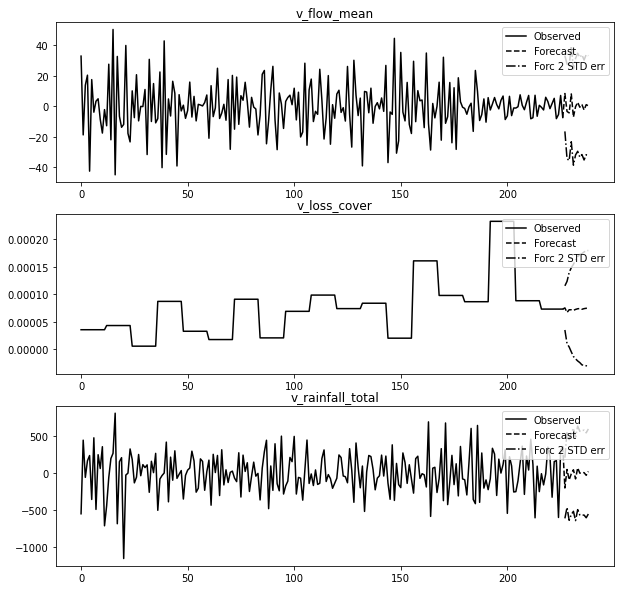

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.994011      0.001624          0.004365
2       0.983185      0.003432          0.013383
3       0.973222      0.003801          0.022977
4       0.971648      0.005506          0.022846

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.010723      0.989277          0.000000
1       0.009739      0.990255          0.000006
2       0.008921      0.991075          0.000004
3       0.016531      0.981914          0.001555
4       0.020956      0.976306          0.002738

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.012726      0.000044          0.987230
1       0.207845      0.000304          0.791851
2       0.276891      0.002801          0.720308
3       0.271488      0.022420          0.706092
4       0.272463      0.037303          0.690234


None
Bias: -0.037185
Mean absolute error: 3.7

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


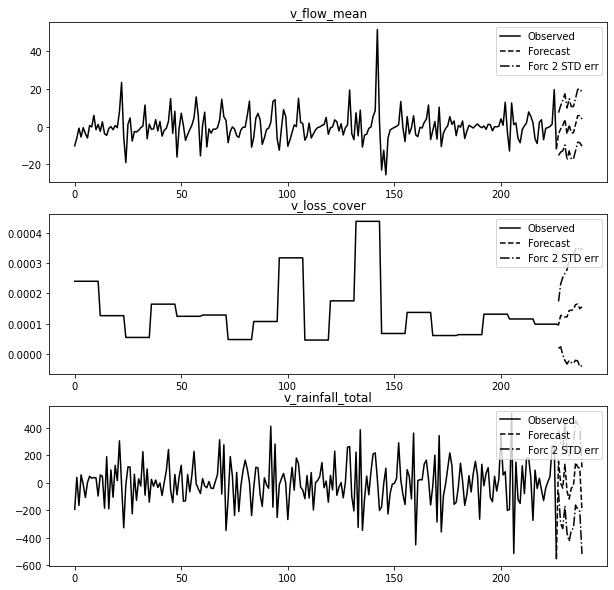

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.933184      0.000000          0.066816
2       0.900883      0.042609          0.056508
3       0.886662      0.041306          0.072032
4       0.882497      0.044192          0.073310

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.002045      0.997955          0.000000
1       0.013897      0.980754          0.005349
2       0.091918      0.879981          0.028101
3       0.117138      0.847809          0.035053
4       0.126242      0.826264          0.047494

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.250285      0.004268          0.745446
1       0.332344      0.007393          0.660263
2       0.326033      0.025412          0.648555
3       0.323700      0.034869          0.641431
4       0.336258      0.035108          0.628635


None
Bias: -0.506156
Mean absolute error: 2.9

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


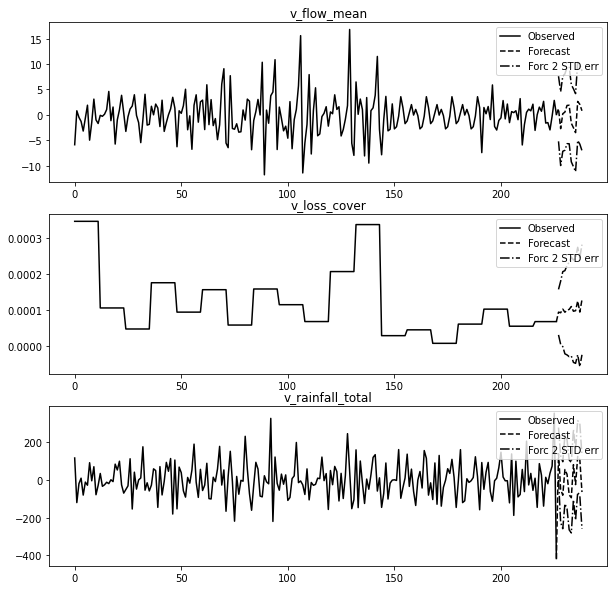

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.950910      0.001398          0.047692
2       0.944836      0.007925          0.047239
3       0.916702      0.010192          0.073106
4       0.913090      0.012457          0.074453

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.052171      0.947829          0.000000
1       0.039239      0.951905          0.008855
2       0.032287      0.958028          0.009685
3       0.026228      0.960114          0.013657
4       0.023483      0.961030          0.015486

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.052069      0.000001          0.947929
1       0.053217      0.001453          0.945330
2       0.057087      0.005017          0.937897
3       0.074891      0.006651          0.918458
4       0.074461      0.010048          0.915491


None
Bias: 0.070001
Mean absolute error: 0.97

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


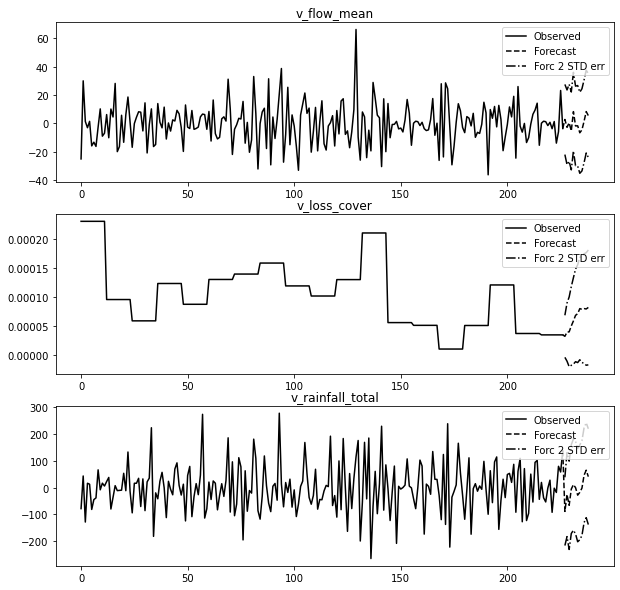

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999971      0.000021          0.000008
2       0.988808      0.006002          0.005190
3       0.981990      0.007854          0.010156
4       0.964557      0.025142          0.010300

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.011225      0.988775          0.000000
1       0.005966      0.989431          0.004603
2       0.004324      0.988956          0.006720
3       0.010125      0.979886          0.009989
4       0.014218      0.973477          0.012305

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.086517      0.004455          0.909028
1       0.087621      0.011381          0.900998
2       0.168397      0.010303          0.821300
3       0.168421      0.018361          0.813219
4       0.178147      0.024146          0.797707


None
Bias: -0.595828
Mean absolute error: 9.8

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


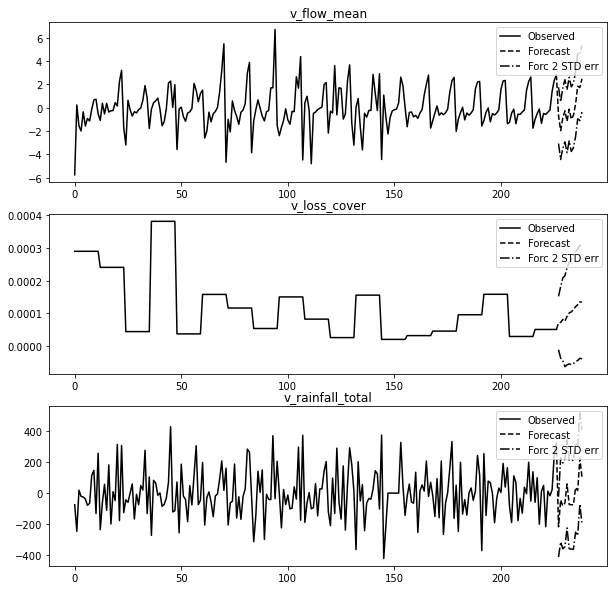

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.993922      0.002862          0.003216
2       0.958259      0.003393          0.038349
3       0.914629      0.009275          0.076096
4       0.903123      0.009784          0.087094

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.055541      0.944459          0.000000
1       0.038169      0.960181          0.001650
2       0.028880      0.969677          0.001443
3       0.023992      0.974762          0.001246
4       0.021191      0.976628          0.002181

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000165      0.002268          0.997567
1       0.156749      0.004839          0.838412
2       0.185357      0.005165          0.809478
3       0.188305      0.004975          0.806720
4       0.186776      0.004935          0.808289


None
Bias: 0.189227
Mean absolute error: 0.32

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


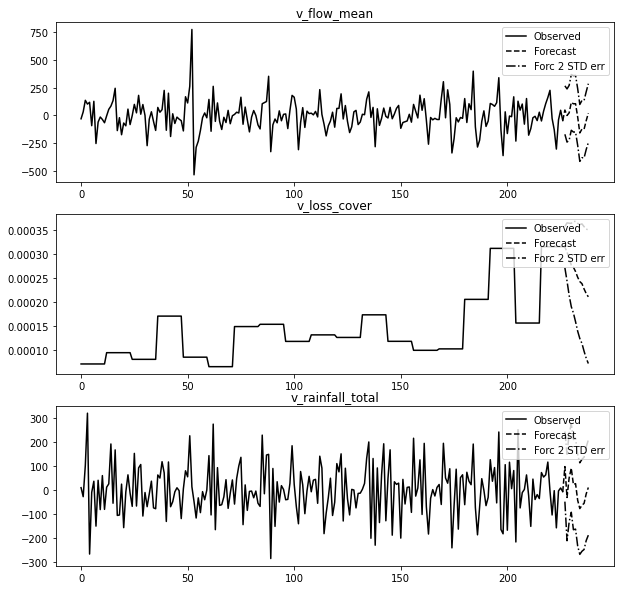

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.971943      0.008072          0.019985
2       0.962201      0.008348          0.029451
3       0.957196      0.011545          0.031259
4       0.948303      0.014240          0.037458

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000972      0.999028          0.000000
1       0.003119      0.993103          0.003778
2       0.011348      0.970745          0.017907
3       0.013777      0.949600          0.036623
4       0.013444      0.948469          0.038087

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.475123      0.000114          0.524763
1       0.457015      0.004036          0.538949
2       0.455151      0.023344          0.521505
3       0.454058      0.023382          0.522560
4       0.452441      0.025645          0.521914


None
Bias: -61.106923
Mean absolute error: 76

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


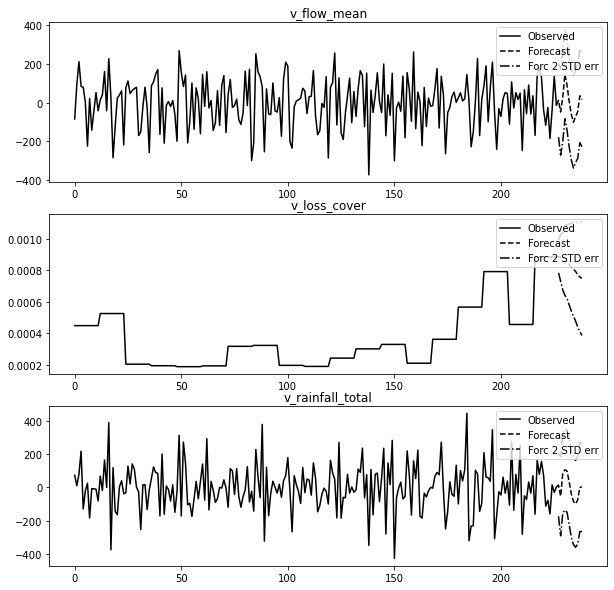

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.996253      0.001555          0.002192
2       0.976740      0.003985          0.019275
3       0.975739      0.004705          0.019556
4       0.973181      0.007384          0.019435

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.004106      0.995894          0.000000
1       0.001991      0.997203          0.000805
2       0.002110      0.995387          0.002503
3       0.001583      0.993731          0.004685
4       0.001278      0.994517          0.004205

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.374131      0.000500          0.625369
1       0.360773      0.005843          0.633384
2       0.352104      0.022201          0.625695
3       0.357422      0.022334          0.620244
4       0.343108      0.061770          0.595122


None
Bias: -23.150796
Mean absolute error: 53

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


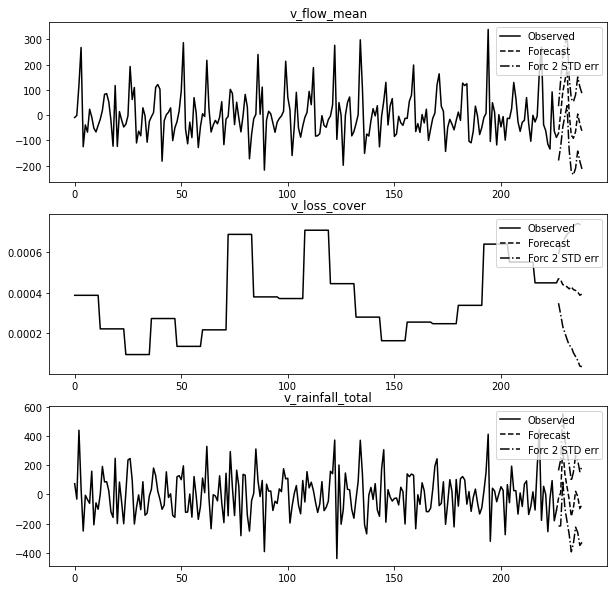

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.861132      0.004675          0.134193
2       0.841694      0.014687          0.143619
3       0.833666      0.024604          0.141730
4       0.802635      0.031530          0.165834

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000624      0.999376          0.000000
1       0.000435      0.988708          0.010857
2       0.000298      0.985783          0.013920
3       0.000257      0.986237          0.013506
4       0.000301      0.987804          0.011894

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.428944      0.000222          0.570834
1       0.493527      0.001360          0.505113
2       0.473912      0.009334          0.516754
3       0.476251      0.010811          0.512938
4       0.466432      0.013449          0.520120


None
Bias: 37.453846
Mean absolute error: 54.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


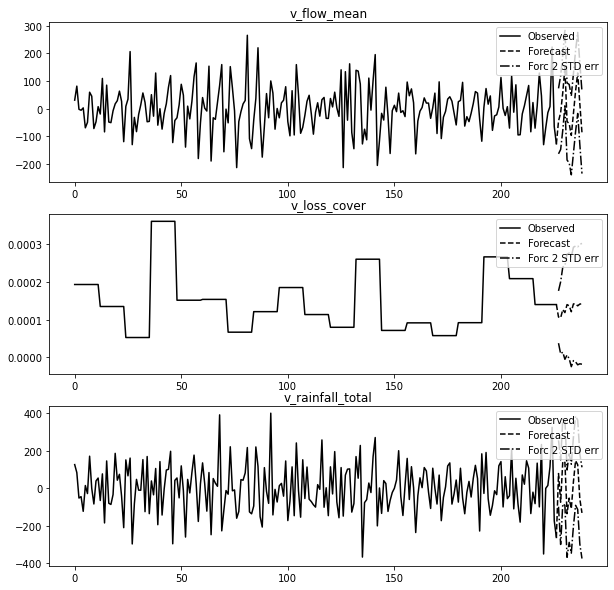

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.984683      0.003762          0.011555
2       0.952552      0.004133          0.043314
3       0.949575      0.007009          0.043416
4       0.931998      0.016241          0.051761

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.018547      0.981453          0.000000
1       0.010775      0.985040          0.004185
2       0.010691      0.981282          0.008027
3       0.008890      0.984267          0.006843
4       0.008372      0.984128          0.007500

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.397627      0.000005          0.602369
1       0.396002      0.000093          0.603905
2       0.392882      0.003584          0.603534
3       0.388879      0.017097          0.594024
4       0.378093      0.028806          0.593101


None
Bias: -3.673336
Mean absolute error: 47.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jul, 2020
Time:                     21:49:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -5.36098
Nobs:                     215.000    HQIC:                  -6.39805
Log likelihood:          -40.8398    FPE:                0.000832740
AIC:                     -7.10117    Det(Omega_mle):     0.000517158
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.884948         2.214710            0.400           0.689
L1.v_flow_mean              -0.598330         0.081847           -7.310           0.000
L1.v_loss_cover          5

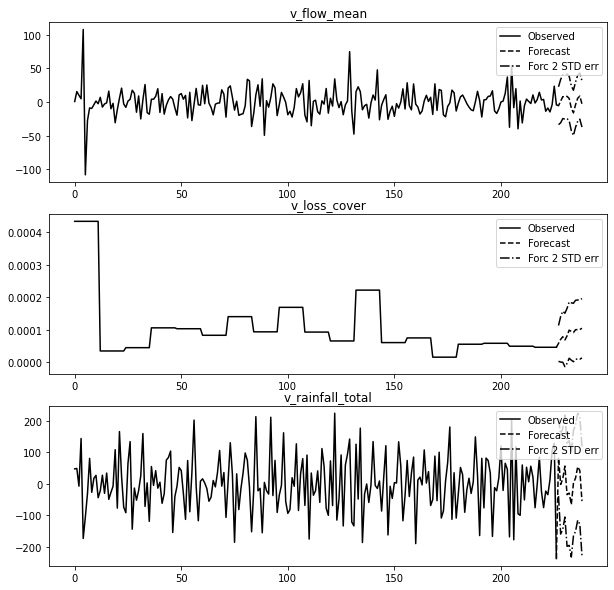

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.910521      0.013804          0.075675
2       0.899549      0.014452          0.085999
3       0.892110      0.015352          0.092539
4       0.883112      0.024858          0.092030

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000683      0.999317          0.000000
1       0.006940      0.992895          0.000165
2       0.013045      0.986227          0.000728
3       0.012525      0.985758          0.001717
4       0.014406      0.970987          0.014607

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.188443      0.006352          0.805206
1       0.235672      0.010467          0.753861
2       0.226832      0.035119          0.738050
3       0.224349      0.047882          0.727768
4       0.237216      0.046718          0.716066


None
Bias: 0.704850
Mean absolute error: 12.2

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


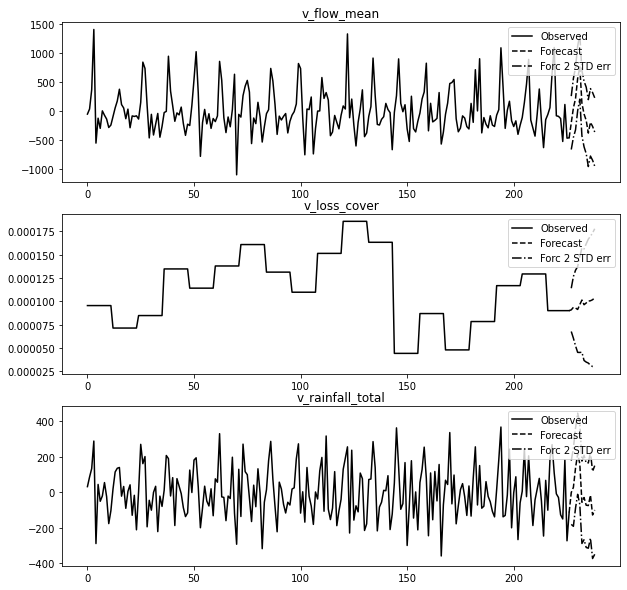

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.934214      0.000071          0.065715
2       0.891617      0.001244          0.107139
3       0.869447      0.004819          0.125734
4       0.864867      0.009482          0.125651

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000321      0.999679          0.000000
1       0.000476      0.999434          0.000090
2       0.000605      0.990618          0.008777
3       0.000773      0.992395          0.006832
4       0.003689      0.982736          0.013575

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.417121      0.000011          0.582868
1       0.420954      0.000374          0.578671
2       0.405881      0.000356          0.593763
3       0.411775      0.009963          0.578262
4       0.411965      0.010696          0.577339


None
Bias: 85.377171
Mean absolute error: 118

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


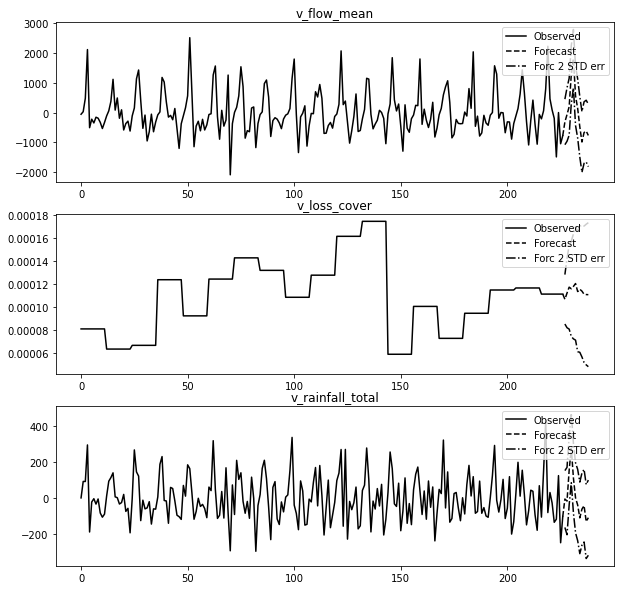

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.831376      0.002788          0.165837
2       0.827470      0.004111          0.168419
3       0.810956      0.004415          0.184629
4       0.805960      0.006775          0.187265

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000164      0.999836          0.000000
1       0.000086      0.999877          0.000038
2       0.000202      0.999193          0.000604
3       0.000159      0.997396          0.002445
4       0.000379      0.996906          0.002715

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.344951      0.000179          0.654870
1       0.392208      0.001378          0.606414
2       0.383840      0.003807          0.612353
3       0.381808      0.010562          0.607630
4       0.381087      0.011583          0.607331


None
Bias: 261.814202
Mean absolute error: 34

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


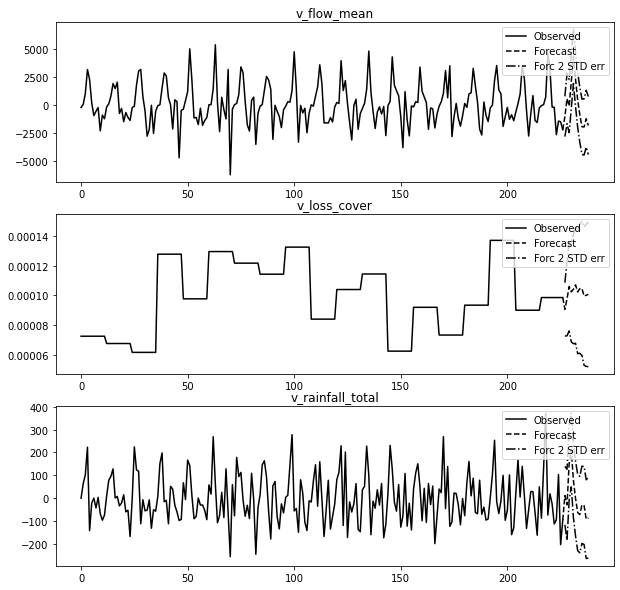

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.818223      0.004015          0.177761
2       0.810216      0.010196          0.179588
3       0.797987      0.013152          0.188861
4       0.785601      0.013260          0.201139

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000280      0.999720          0.000000
1       0.000180      0.999766          0.000054
2       0.001276      0.998601          0.000123
3       0.001026      0.992715          0.006259
4       0.001113      0.991297          0.007590

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.131645      0.001793          0.866562
1       0.162659      0.007645          0.829696
2       0.153173      0.039827          0.807001
3       0.155392      0.041867          0.802741
4       0.152542      0.056908          0.790550


None
Bias: 953.425338
Mean absolute error: 10

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


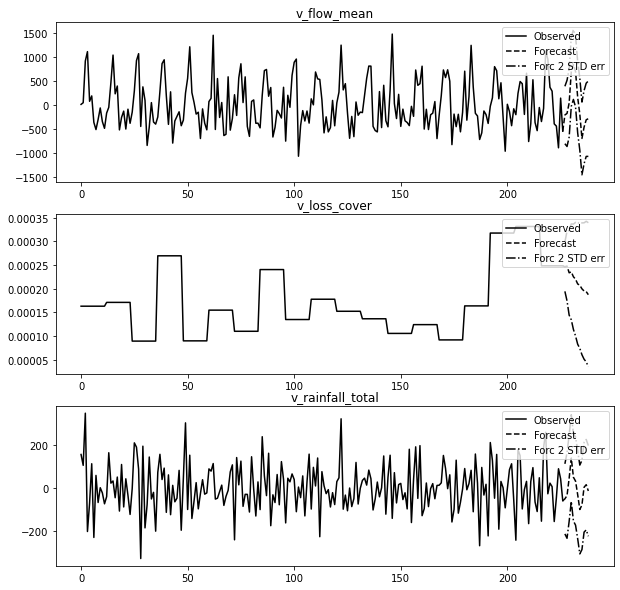

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.918489      0.000668          0.080843
2       0.909183      0.002527          0.088291
3       0.891786      0.013136          0.095078
4       0.889351      0.016895          0.093754

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001559      0.998441          0.000000
1       0.000802      0.995191          0.004007
2       0.002252      0.989537          0.008211
3       0.002163      0.989115          0.008722
4       0.002436      0.990311          0.007254

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.158178      0.004108          0.837714
1       0.178815      0.003344          0.817841
2       0.178509      0.005255          0.816236
3       0.178494      0.009270          0.812236
4       0.187769      0.011381          0.800850


None
Bias: -49.753232
Mean absolute error: 21

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


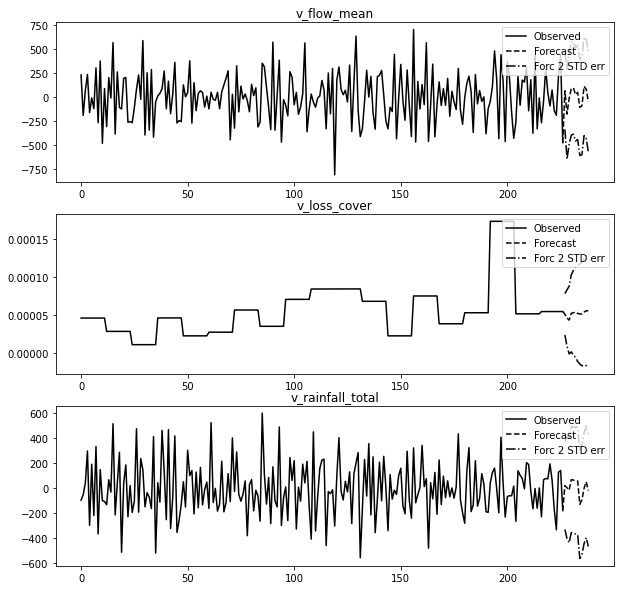

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.994037      0.001140          0.004823
2       0.974104      0.015369          0.010527
3       0.972059      0.015173          0.012768
4       0.969495      0.017488          0.013017

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.007963      0.992037          0.000000
1       0.007801      0.991049          0.001150
2       0.005461      0.993350          0.001189
3       0.005011      0.984235          0.010754
4       0.006836      0.976015          0.017149

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.295163      0.000480          0.704357
1       0.243506      0.000356          0.756139
2       0.291766      0.001633          0.706601
3       0.289912      0.002519          0.707569
4       0.288764      0.002969          0.708268


None
Bias: -63.387558
Mean absolute error: 31

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


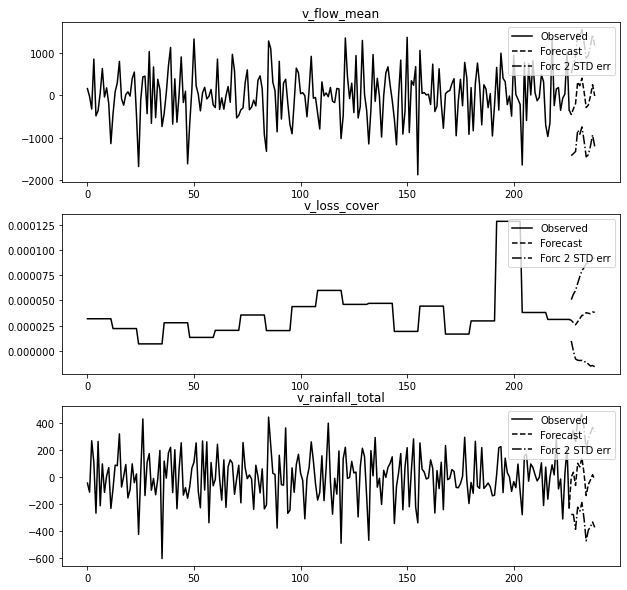

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.950739      0.010094          0.039167
2       0.890034      0.038966          0.071000
3       0.890164      0.039695          0.070141
4       0.886695      0.043596          0.069709

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.051383      0.948617          0.000000
1       0.047019      0.948659          0.004322
2       0.034803      0.957060          0.008137
3       0.029670      0.963872          0.006458
4       0.025012      0.969251          0.005737

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.332355      0.008888          0.658757
1       0.323058      0.008241          0.668701
2       0.337164      0.011871          0.650965
3       0.338304      0.011842          0.649853
4       0.343696      0.017045          0.639259


None
Bias: 149.384659
Mean absolute error: 53

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jul, 2020
Time:                     21:49:31
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.43635
Nobs:                     216.000    HQIC:                   4.48640
Log likelihood:          -1232.46    FPE:                    47.0111
AIC:                      3.84247    Det(Omega_mle):         30.3209
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.673628        40.102675           -0.017           0.987
L1.v_flow_mean              -0.534631         0.080286           -6.659           0.000
L1.v_loss_cover          5

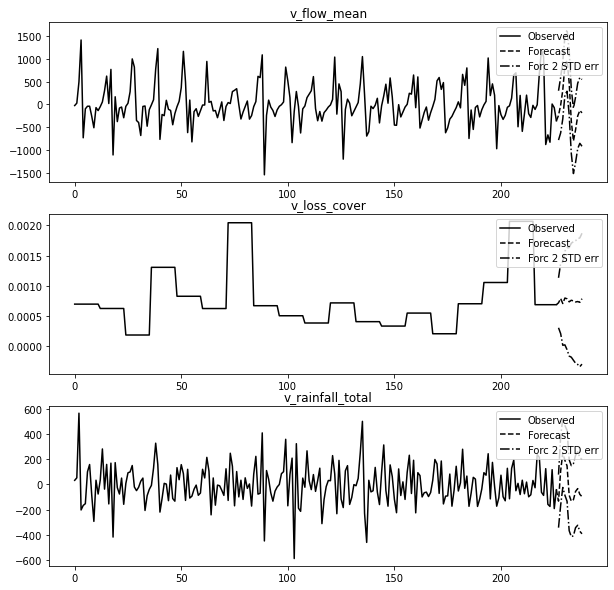

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.996961      0.001328          0.001711
2       0.994773      0.001315          0.003912
3       0.979051      0.014714          0.006235
4       0.886850      0.104685          0.008465

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001113      0.998887          0.000000
1       0.002317      0.991603          0.006081
2       0.002631      0.992753          0.004616
3       0.002755      0.993543          0.003702
4       0.002604      0.993765          0.003631

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.220973      0.000802          0.778225
1       0.230148      0.000484          0.769368
2       0.229281      0.002405          0.768314
3       0.225734      0.009404          0.764862
4       0.225711      0.010763          0.763526


None
Bias: 115.690874
Mean absolute error: 37

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


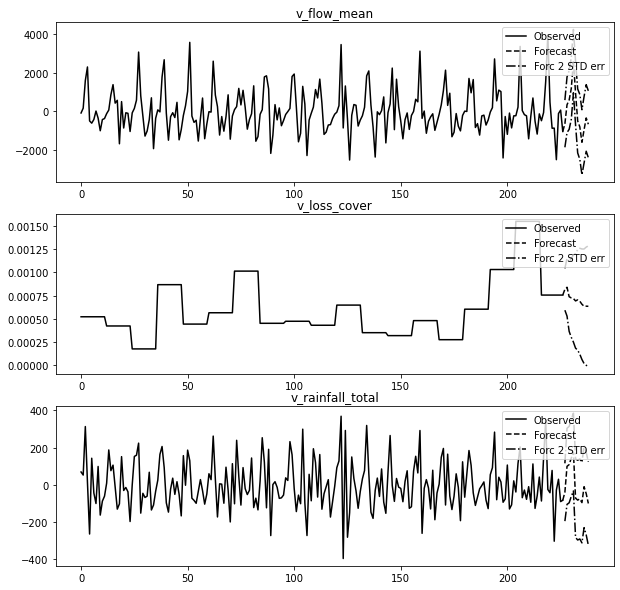

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.916276      0.000024          0.083700
2       0.893448      0.016869          0.089683
3       0.809272      0.109959          0.080769
4       0.786871      0.105310          0.107819

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000477      0.999523          0.000000
1       0.002933      0.996517          0.000550
2       0.002060      0.997344          0.000596
3       0.001752      0.997786          0.000462
4       0.003759      0.994121          0.002121

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.352108      0.000114          0.647778
1       0.404476      0.000151          0.595373
2       0.402532      0.003448          0.594020
3       0.400317      0.008272          0.591411
4       0.391269      0.008276          0.600455


None
Bias: 285.584315
Mean absolute error: 76

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


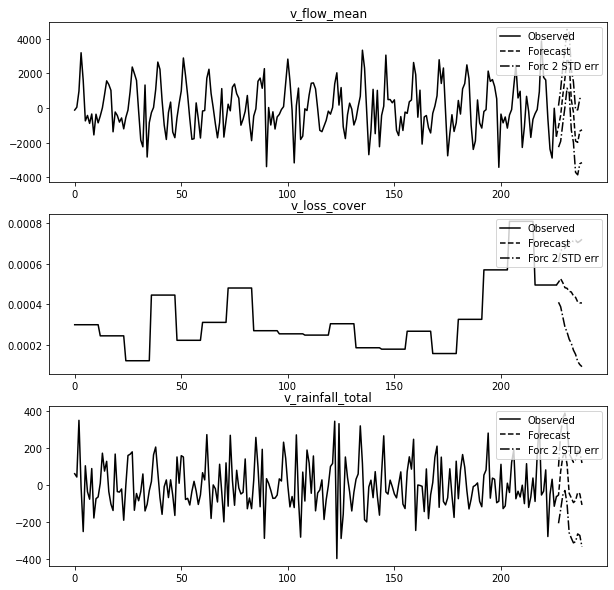

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.755866      0.000000          0.244134
2       0.764483      0.001978          0.233538
3       0.736759      0.038460          0.224781
4       0.711928      0.041417          0.246654

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.005893      0.994107          0.000000
1       0.011431      0.986784          0.001785
2       0.008054      0.990707          0.001239
3       0.006512      0.992551          0.000936
4       0.008815      0.987999          0.003186

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.055484      0.001218          0.943299
1       0.105256      0.000766          0.893977
2       0.105031      0.016952          0.878016
3       0.114197      0.019990          0.865813
4       0.135331      0.019474          0.845195


None
Bias: 571.465221
Mean absolute error: 10

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


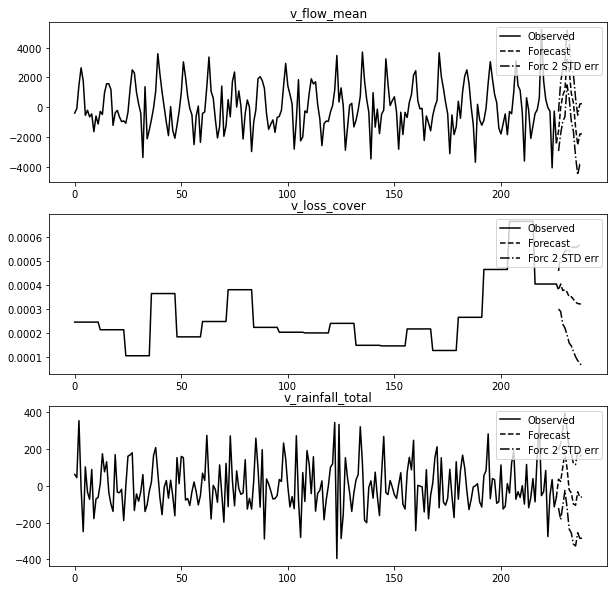

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.782451      0.000005          0.217544
2       0.773085      0.011366          0.215548
3       0.740653      0.019004          0.240342
4       0.729823      0.031975          0.238202

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.010874      0.989126          0.000000
1       0.028930      0.971055          0.000015
2       0.030846      0.967028          0.002126
3       0.033489      0.962437          0.004075
4       0.027402      0.969263          0.003335

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.010747      0.000437          0.988816
1       0.040116      0.002745          0.957139
2       0.044189      0.011372          0.944439
3       0.043867      0.018281          0.937853
4       0.043826      0.018046          0.938129


None
Bias: 302.712681
Mean absolute error: 69

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [36]:
AIC = []
BIC = []
RMSE = []
means = []
sd = []
MAPE = []
sMAPE = []
p_order = []
list_df_plot = []

for i in mcs:
    print("\n ################ Basin " + str(i) + " ############### \n")
    #select data for that basin, split train and test
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                     'v_rainfall_total']].copy().reset_index(drop = True)
    nobs = 12 #predict 1 year
    df_train, df_test = temp_df[0:-nobs], temp_df[-nobs:]

    # 1st difference to transform to Stationary
    df_differenced = df_train.diff().dropna()# stationarity test again with differenced data


    # VAR model fitting
    model = VAR(df_differenced)
    results = model.fit(maxlags=12, ic='aic') #choose VAR order p from 0 to maxlags, the one with lowest AIC
    print(results.summary())
    AIC.append(results.aic)
    BIC.append(results.aic)
    p_order.append(results.k_ar)

    results.plot_forecast(12)
    plt.show()

    fevd = results.fevd(5)
    print(fevd.summary())

    # forecasting
    pred = results.forecast(results.y, steps=nobs)
    df_forecast = pd.DataFrame(pred, index=temp_df.index[-nobs:], columns=temp_df.columns + '_1d')

    df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
    df_results.loc[:, ['v_flow_mean_forecast', 'v_loss_cover_forecast', 'v_rainfall_total_forecast']]

    #Forecast bias
    forecast_errors = df_results['v_flow_mean_forecast'] - df_test['v_flow_mean']
    bias = sum(forecast_errors) * 1.0/len(df_test['v_flow_mean'])
    print('Bias: %f' % bias)
    print('Mean absolute error:', mean_absolute_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast']))
    print('Mean squared error:', mean_squared_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast']))
    print('Root mean squared error:', sqrt(mean_squared_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast'])))
    
    RMSE.append(sqrt(mean_squared_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast'])))
    MAPE.append(np.mean(np.abs((df_test['v_flow_mean'] - df_results['v_flow_mean_forecast']) / df_test['v_flow_mean'])) * 100)
    sMAPE.append(np.mean(np.abs((df_test['v_flow_mean'] - df_results['v_flow_mean_forecast']) / (abs(df_test['v_flow_mean'])+abs(df_results['v_flow_mean_forecast'])))) * 100)

    means.append(mean(df_test['v_flow_mean']))
    sd.append(std(df_test['v_flow_mean']))
    
    #Export observed and predicted for plotting
    dict1 = {'River flow' : temp_df['v_flow_mean'], 'River flow forecast' : df_results['v_flow_mean_forecast']}
    df_plot = pd.DataFrame(dict1)
    df_plot.index = macrodata[data['mc'] == i]['date'].reset_index().date
    list_df_plot.append(df_plot)

In [37]:
#pd.DataFrame(RMSE, means, sd)
dict = {'basin': mcs, 'mean': means, 'stdev': sd, 'AIC': AIC, 'BIC': BIC, 
        'RMSE': RMSE,  'MAPE': MAPE, 'sMAPE': sMAPE, 'p': p_order}  
    
df = pd.DataFrame(dict) 
df

basin         mean        stdev        AIC        BIC         RMSE  \
0       1     2.920833     0.900412 -10.135355 -10.135355     0.429029   
1       2    25.008333    16.602363  -6.620554  -6.620554    11.967917   
2       3   147.238333    67.183058  -4.714561  -4.714561    34.316024   
3       4     4.406667     1.450835  -8.043113  -8.043113     1.575759   
4       5    59.395000    19.536615  -7.017609  -7.017609    19.925130   
5       6    27.300833    16.374302  -7.069378  -7.069378    13.247579   
6       7   224.851198    88.880777  -2.811788  -2.811788    58.311998   
7       8    43.363685    17.011325  -7.373356  -7.373356     9.601369   
8       9    12.935383    11.323009 -12.423358 -12.423358     8.738487   
9      10    12.231319     7.840553  -6.345190  -6.345190     5.726954   
10     11    15.236829     7.862569 -10.009391 -10.009391     5.782740   
11     12    20.636667    19.122077 -10.381659 -10.381659    21.239728   
12     13   242.083789    90.659822  -1.292733  -1.292733    85.780135   
13     14    73.815918    32.902712  -7.475084  -7.475084    28.147015   
14     15    61.351642    33.319093  -1.755525  -1.755525    27.853771   
15     16   351.190848    72.177380  -0.194995  -0.194995   202.436114   
16     17    12.320503     3.791521 -10.462916 -10.462916     2.267194   
17     18    53.520259    13.018437  -3.588946  -3.588946    12.666243   
18     19     6.156359     4.701809 -10.260487 -10.260487     3.606622   
19     20    60.711918    11.064524  -4.164621  -4.164621    54.139257   
20     21     8.969167     2.098124  -8.471575  -8.471575     1.395696   
21     22   198.164652   147.983123  -2.969004  -2.969004    81.122793   
22     23   137.437500    93.069790  -4.032358  -4.032358    69.034385   
23     24    14.660367     4.072216  -4.473229  -4.473229    11.342346   
24     25     7.566667     3.062236  -7.946743  -7.946743     3.220406   
25     26    43.844167    29.975277  -1.088657  -1.088657   498.422417   
26     27     8.430000     3.567871  -5.098055  -5.098055    16.077085   
27     28    69.698405    41.344610  -2.393089  -2.393089    21.683809   
28     29    59.180833     3.721399  -5.596058  -5.596058     4.334056   
29     30     8.373260     6.461992  -7.089746  -7.089746     3.446256   
30     31     7.743819     1.582523  -9.425065  -9.425065     1.186365   
31     32    33.953333    12.437392  -8.052384  -8.052384    11.323138   
32     33     4.290833     1.783986 -10.151720 -10.151720     0.507696   
33     34   378.217491   162.346248  -3.580526  -3.580526   100.108500   
34     35   417.575511    99.642703  -1.469201  -1.469201    71.288348   
35     36   141.696875   111.460374  -2.365854  -2.365854    67.435100   
36     37    98.873288    68.746391  -3.355808  -3.355808    62.357101   
37     38    50.946098    18.903331  -7.101168  -7.101168    16.415211   
38     39   915.598646   590.429642  -2.839332  -2.839332   148.648092   
39     40  1625.150937  1275.656030  -2.126679  -2.126679   423.775548   
40     41  3490.361007  2707.923377  -0.924365  -0.924365  1362.340925   
41     42  1431.539062   801.411201  -0.540654  -0.540654   254.532591   
42     43  1023.469019   402.283979  -1.283522  -1.283522   377.344719   
43     44  2834.233911   855.735214  -0.640286  -0.640286   699.672028   
44     45   879.431458   814.011331   3.842467   3.842467   464.025743   
45     46  2290.838906  1720.735348   3.471279   3.471279   940.311491   
46     47  2960.676562  2494.811434   2.136088   2.136088  1360.928155   
47     48  4113.757594  2990.969453   1.964451   1.964451   865.513367   

           MAPE      sMAPE   p  
0     10.793563   5.450960  12  
1     54.618032  21.100981  12  
2     16.865299   7.693509  11  
3     39.151558  16.530123   5  
4     23.301680  12.630221   4  
5     25.544804  13.257794   7  
6     23.513795  11.183199  12  
7     19.990775   8.268979  12  
8    127.034091  35.993355  11  
9     51.266703  18.482050  11  
10    42.67829

In [47]:
df.to_csv(r'VAR_results.csv', index=False)

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

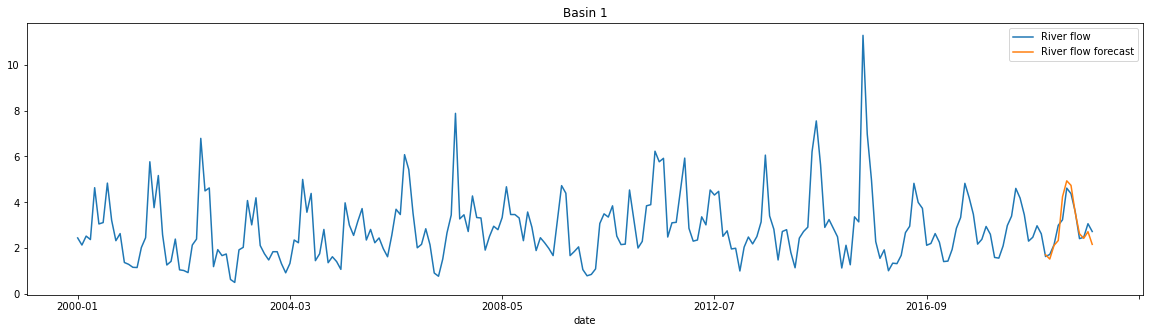

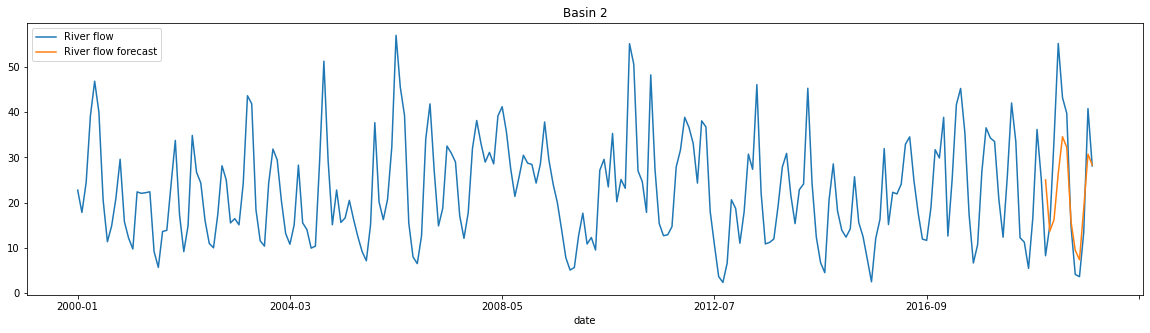

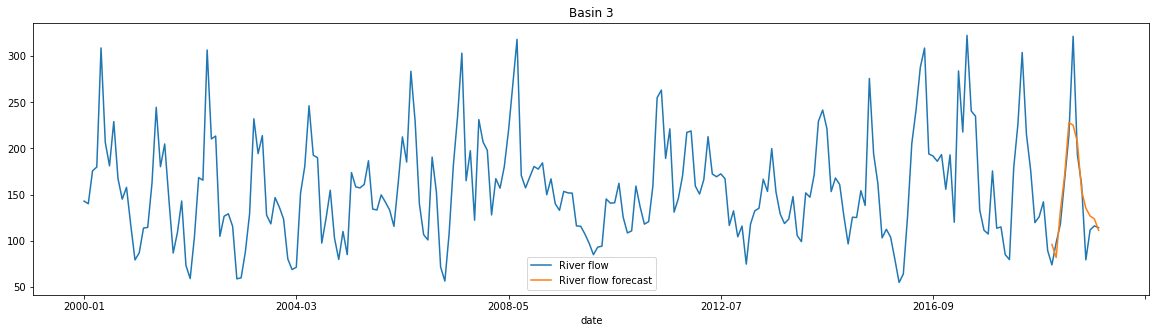

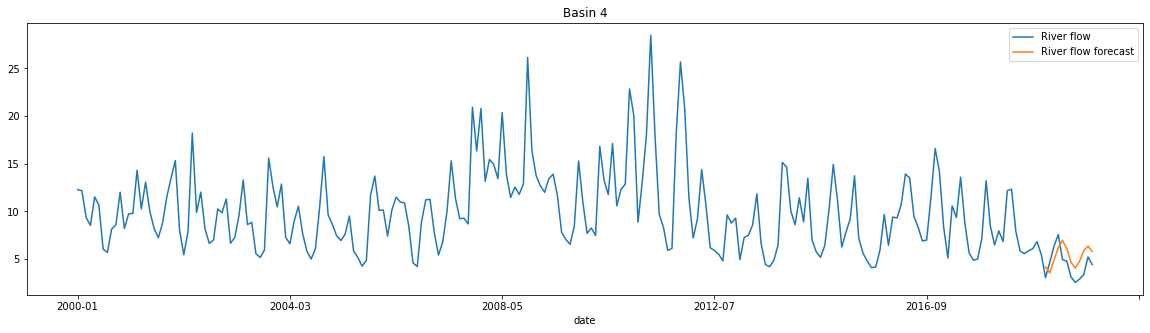

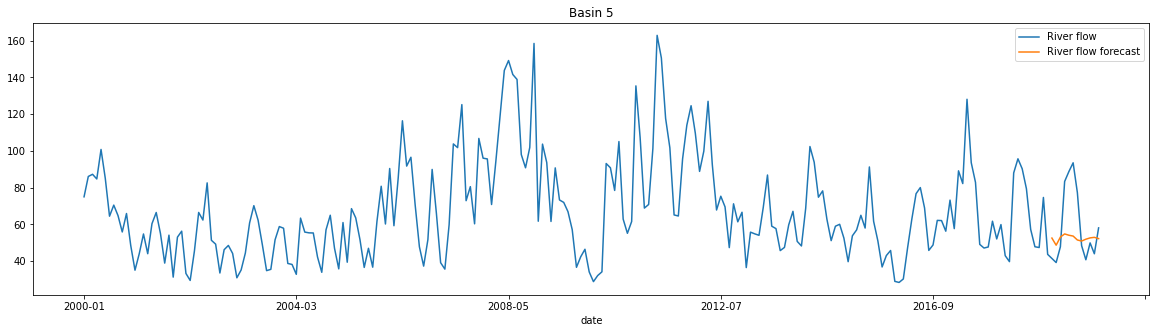

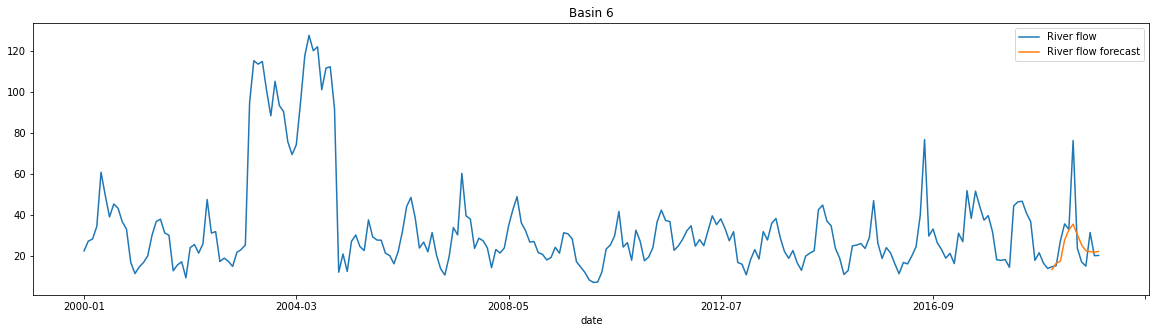

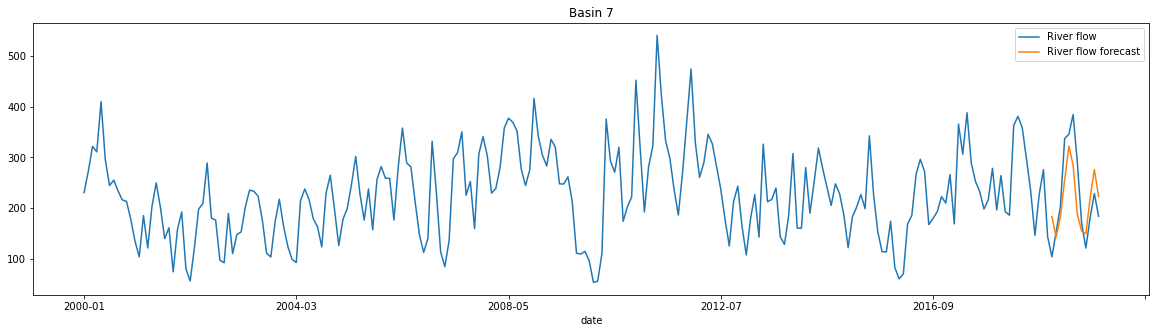

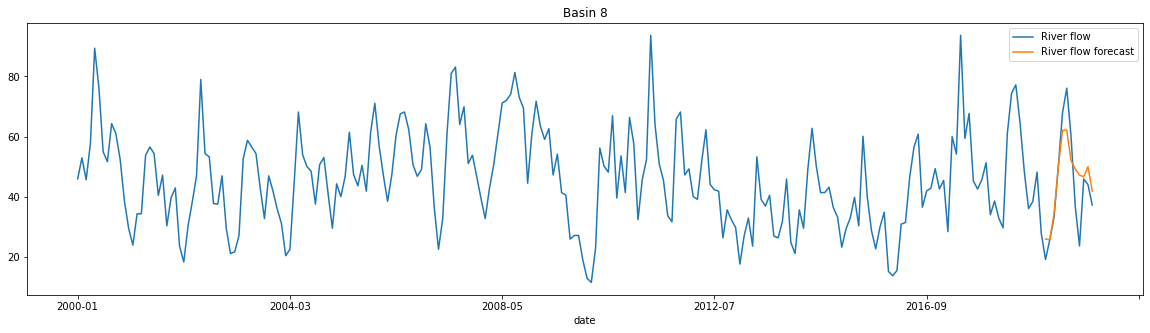

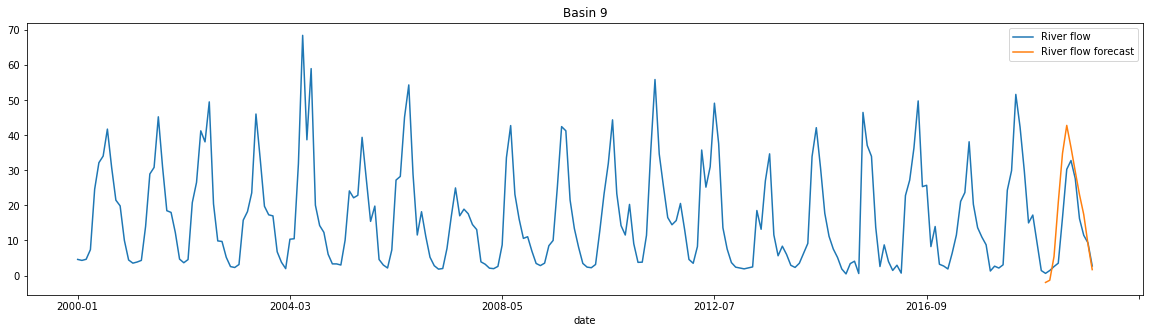

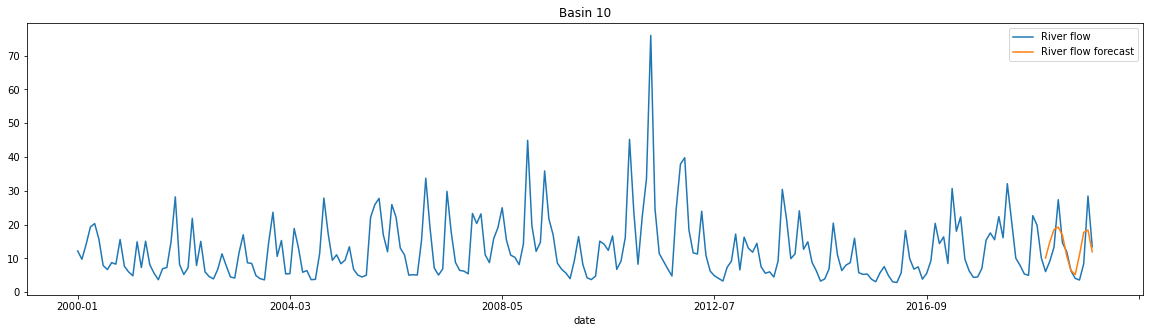

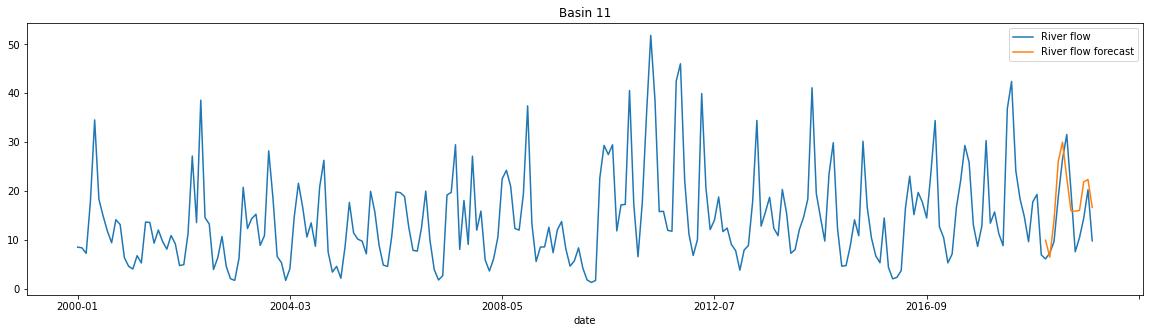

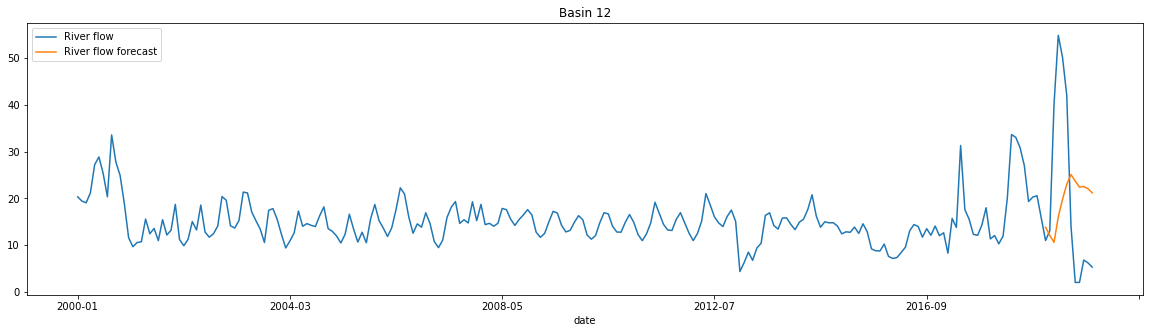

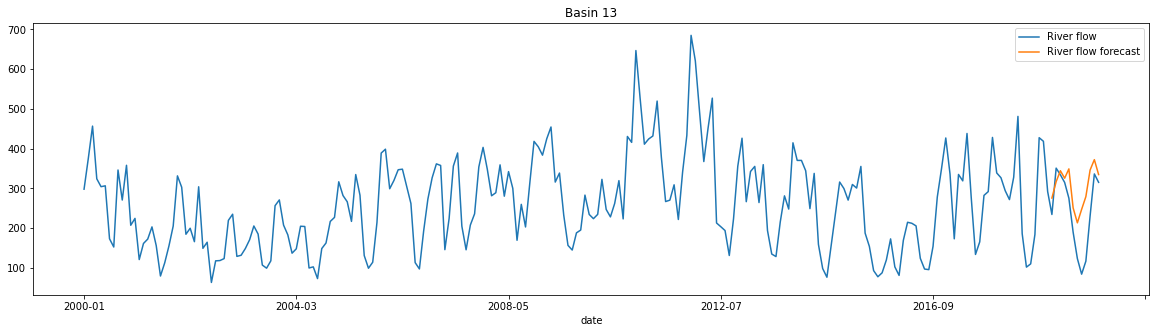

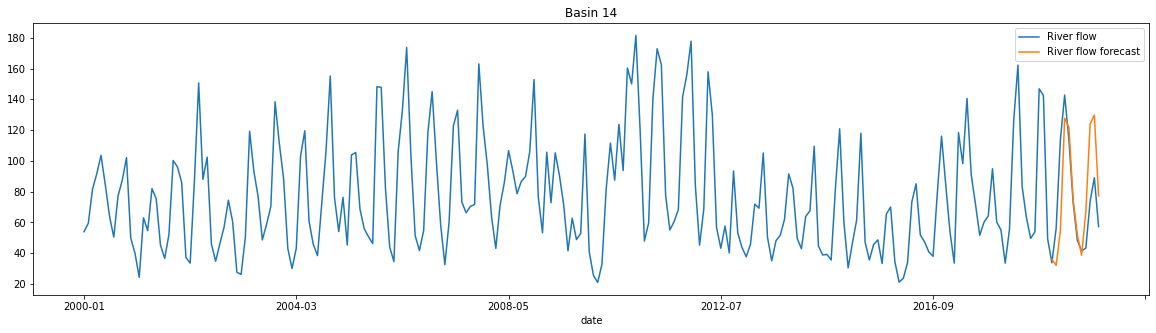

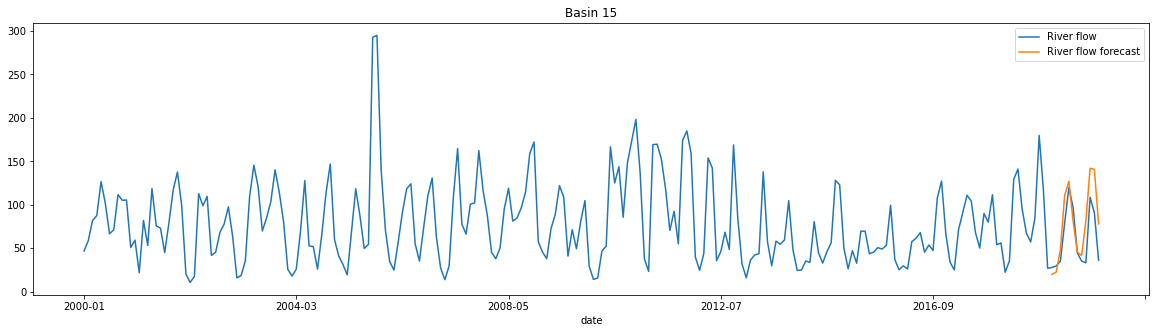

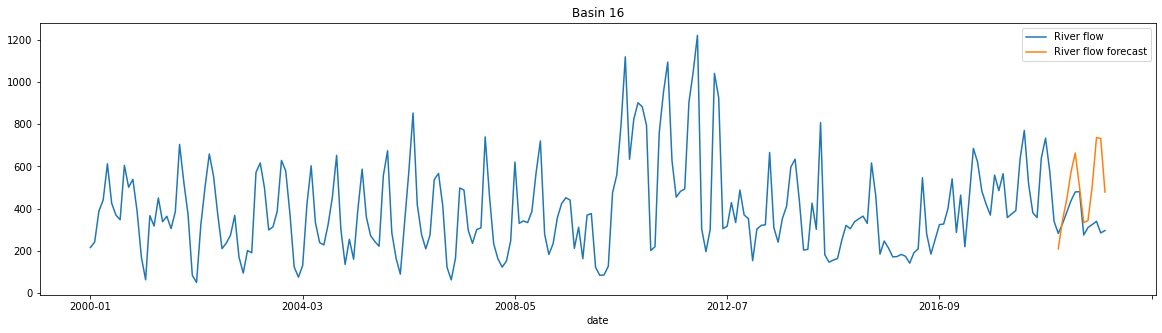

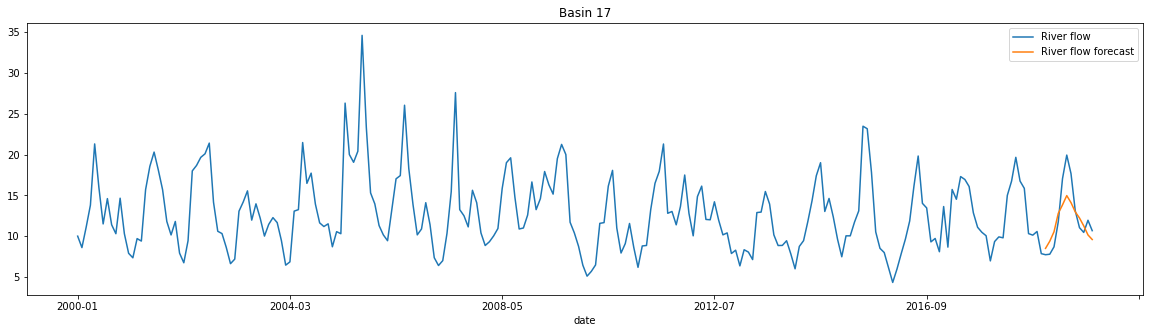

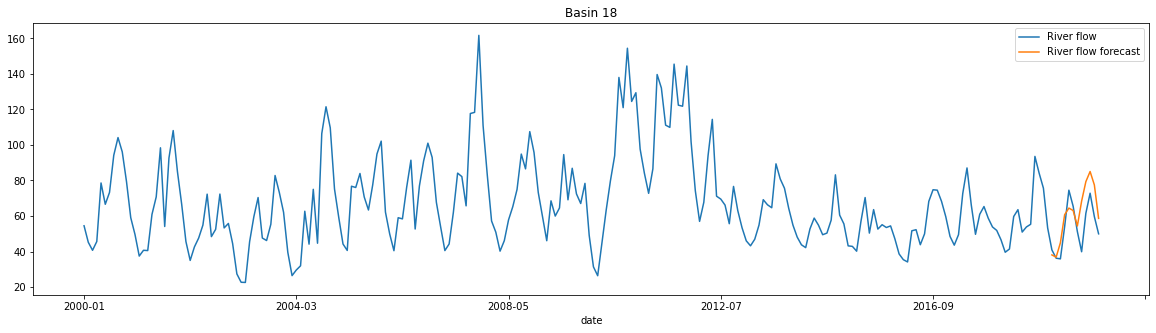

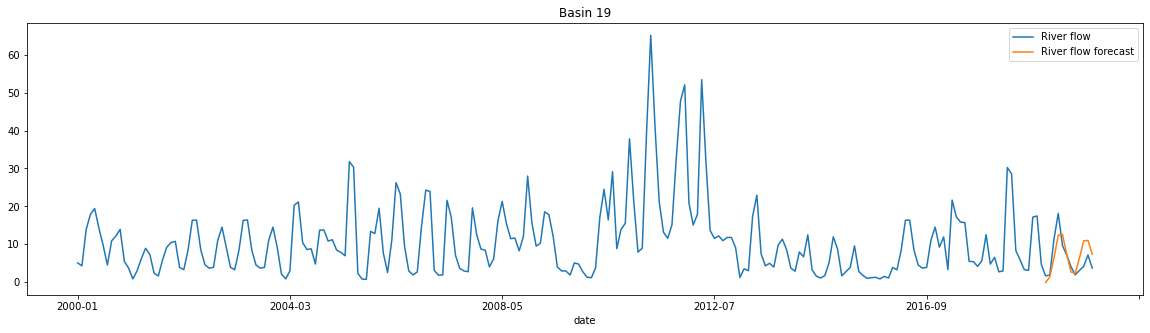

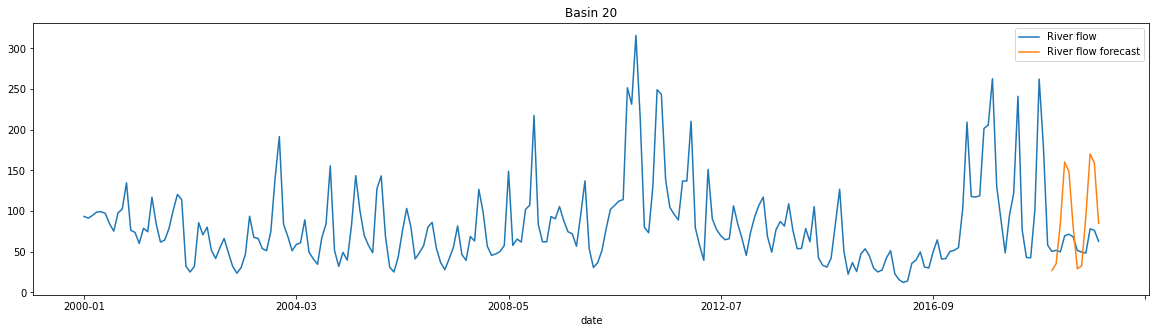

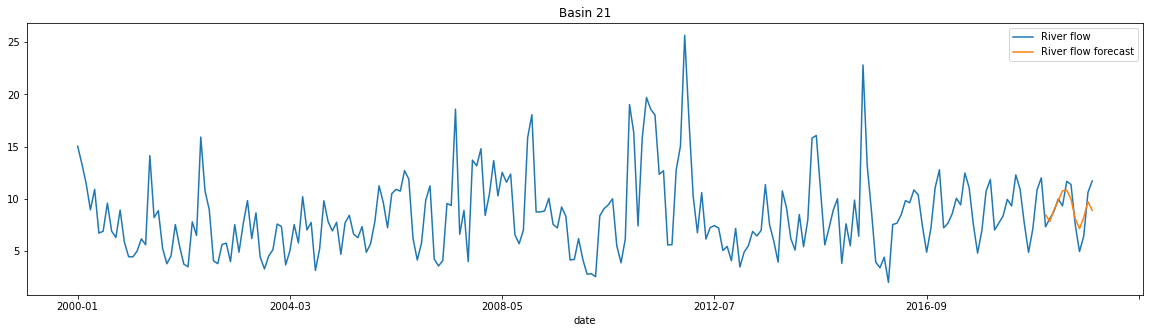

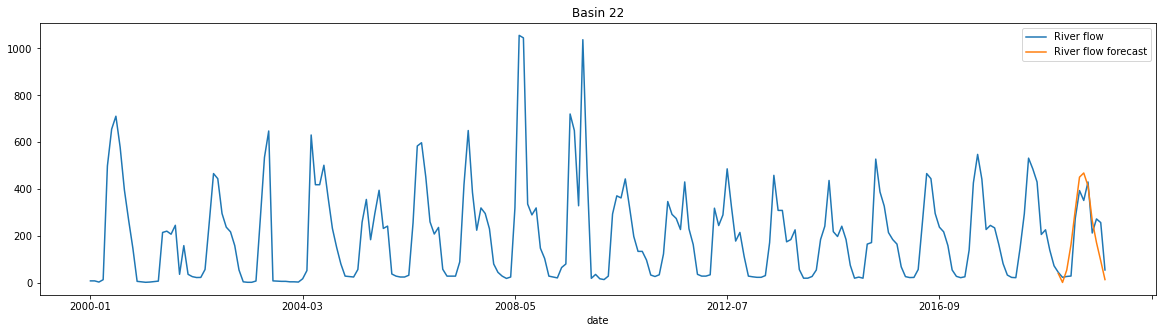

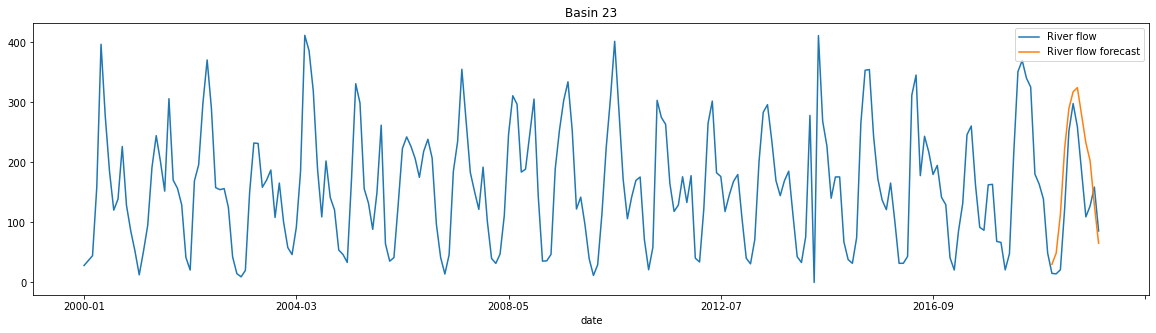

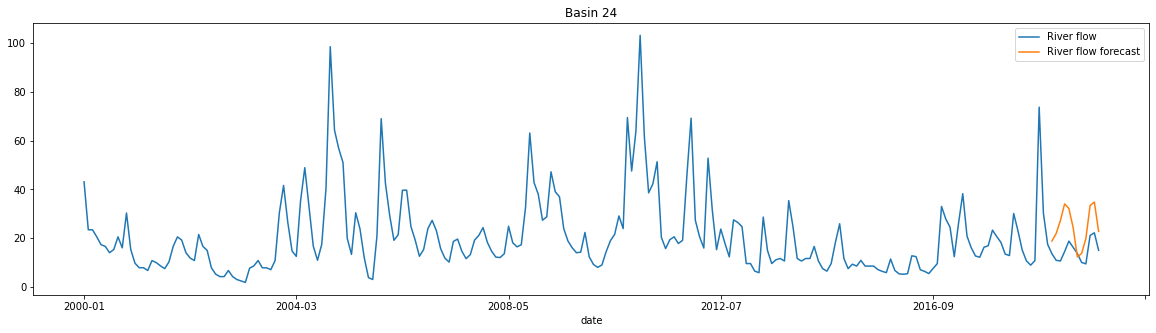

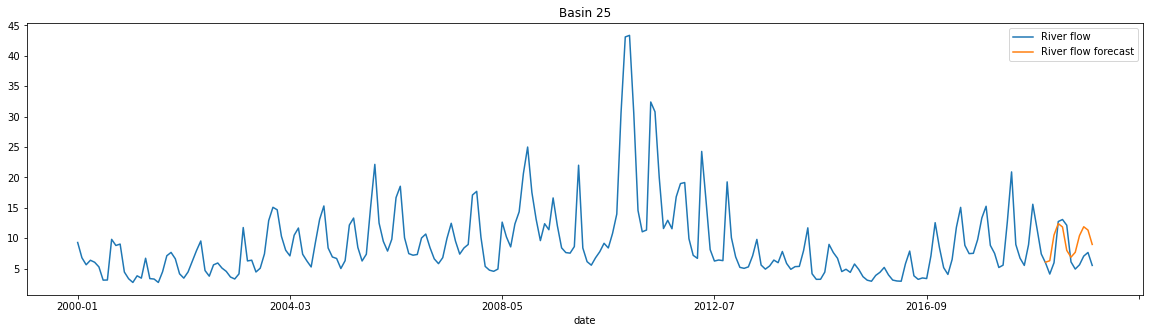

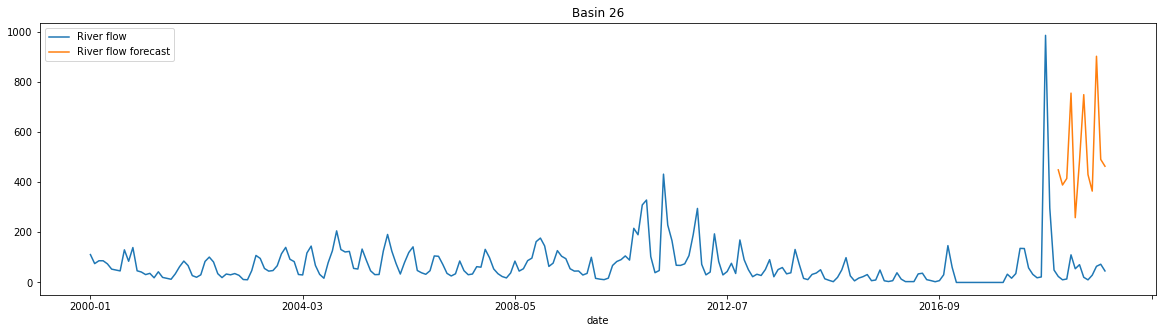

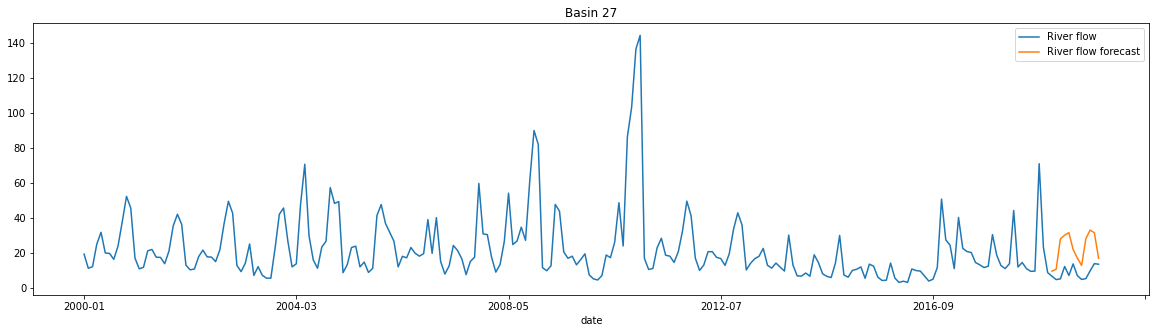

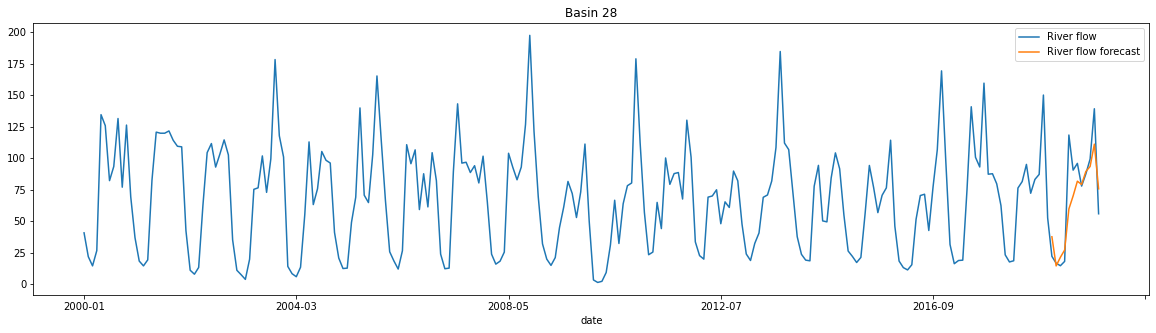

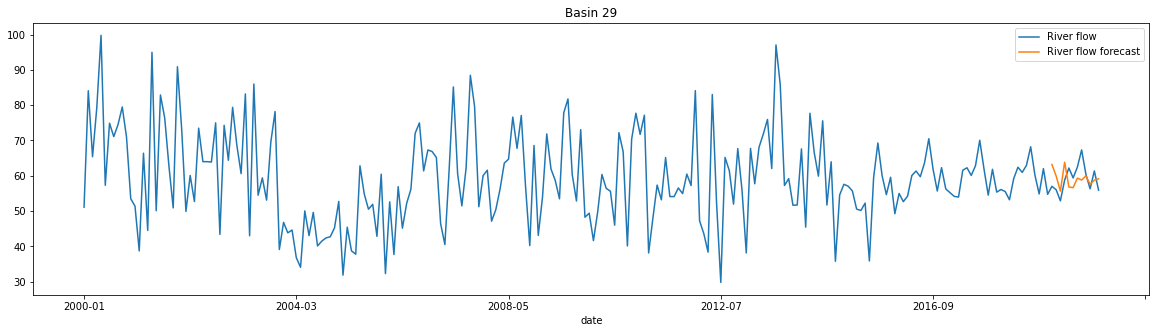

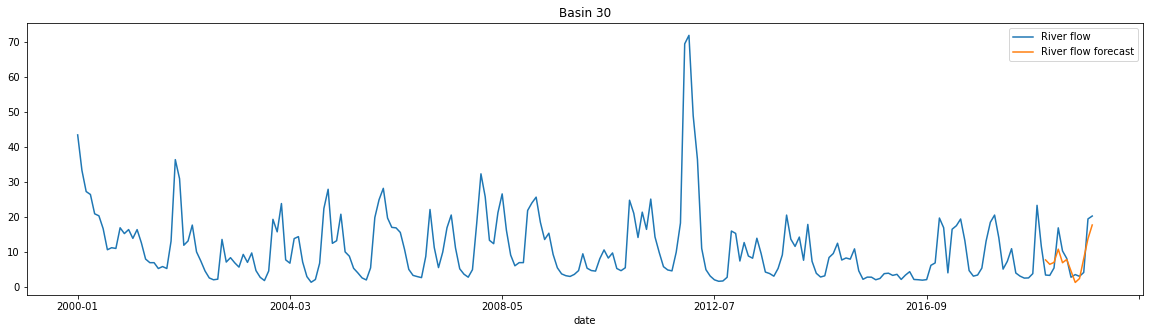

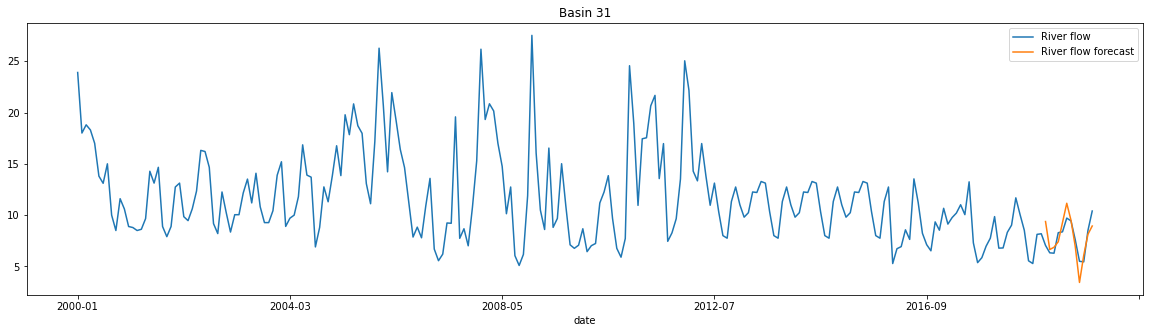

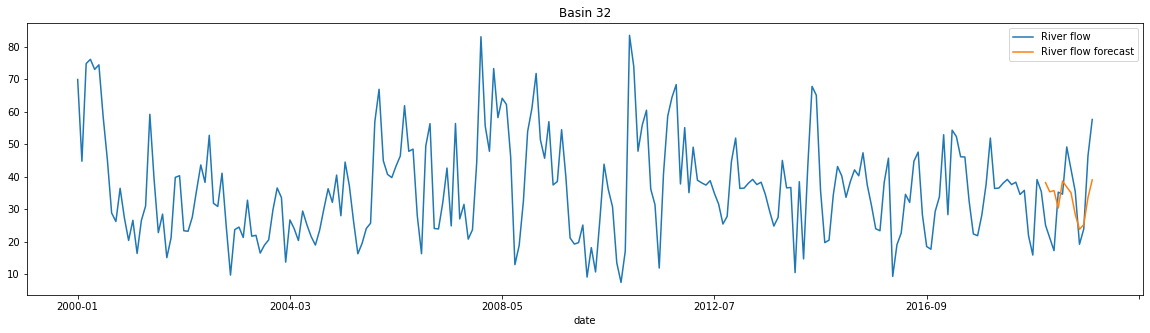

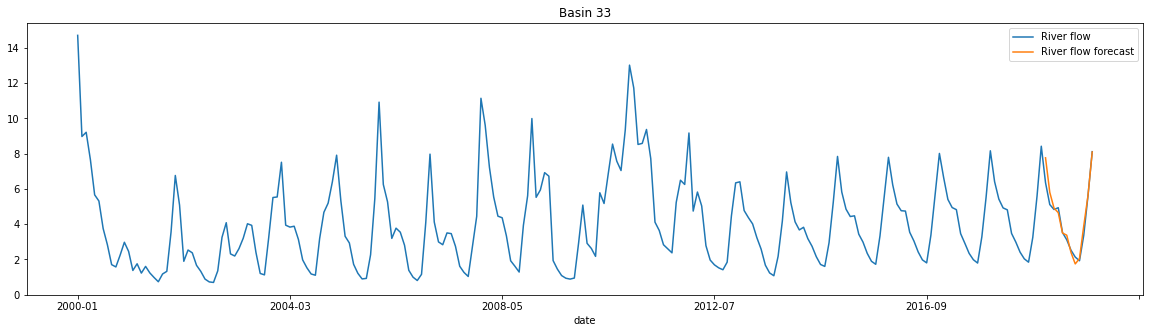

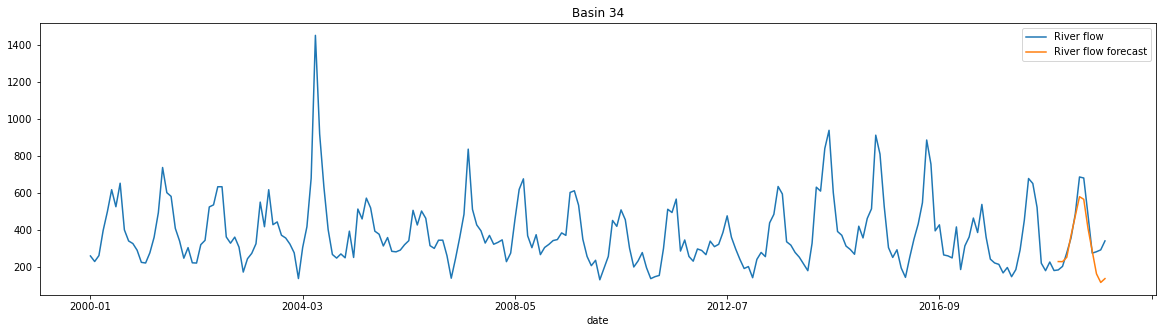

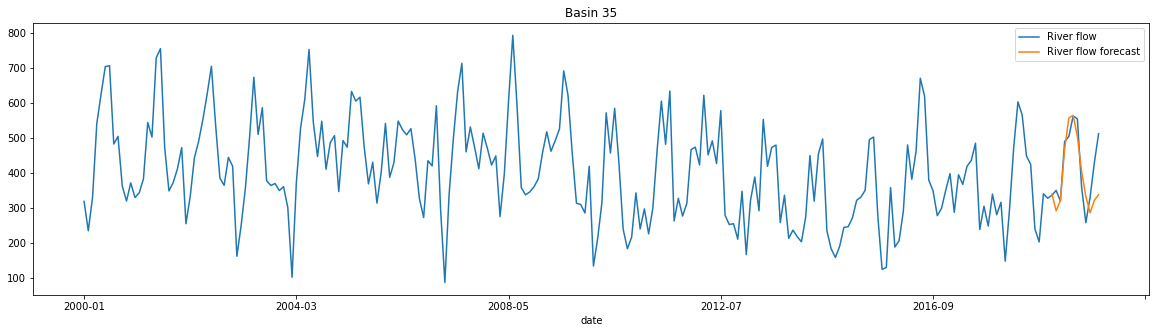

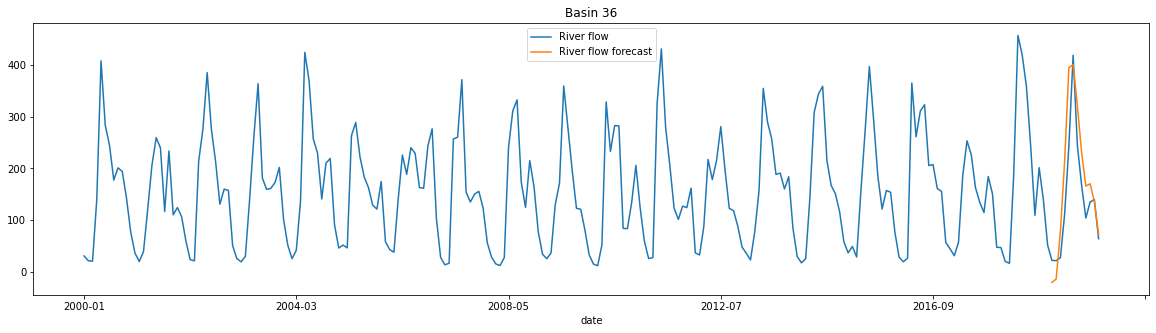

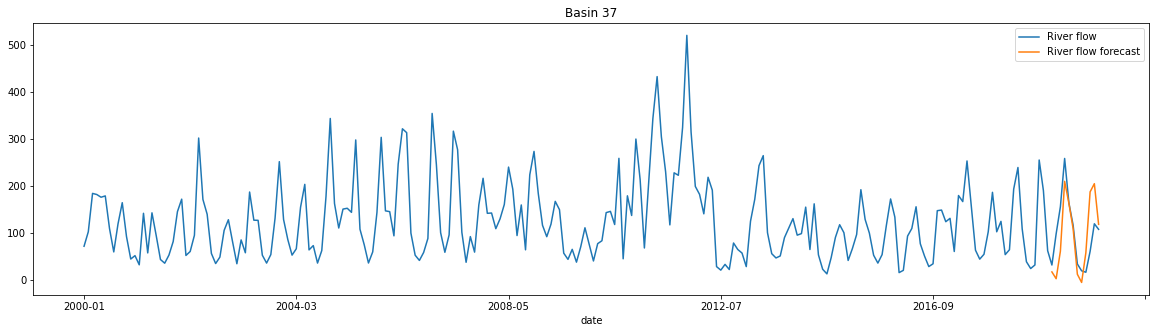

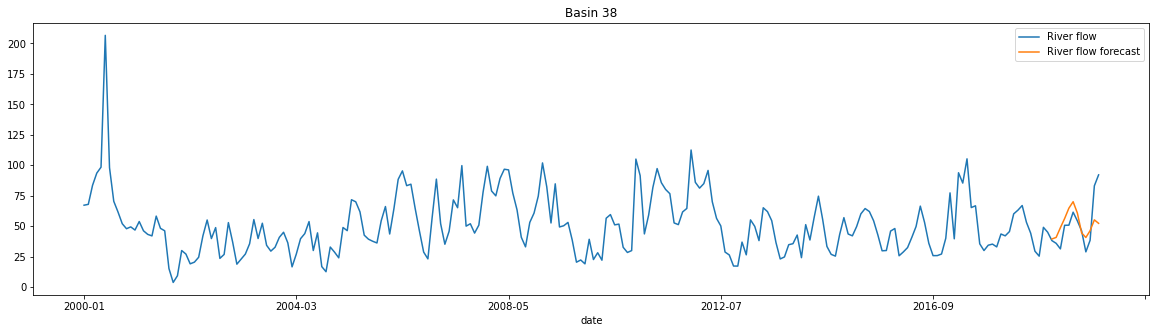

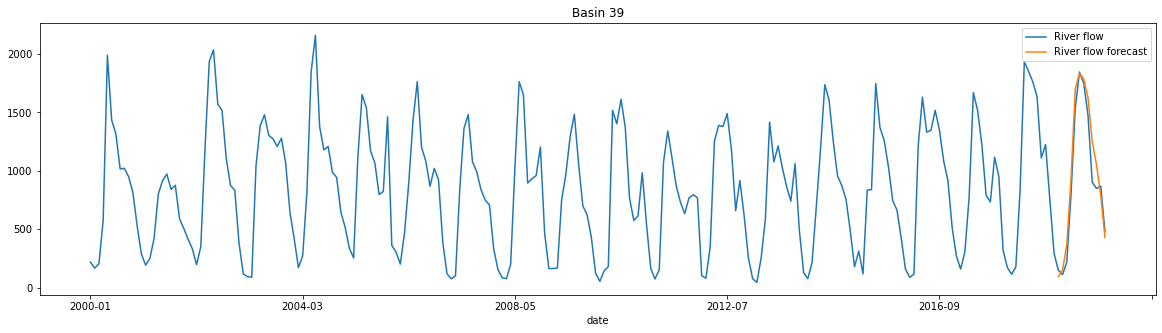

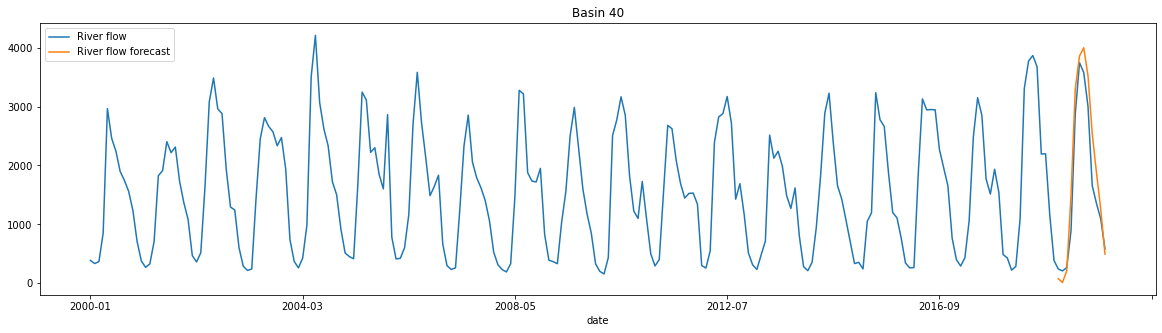

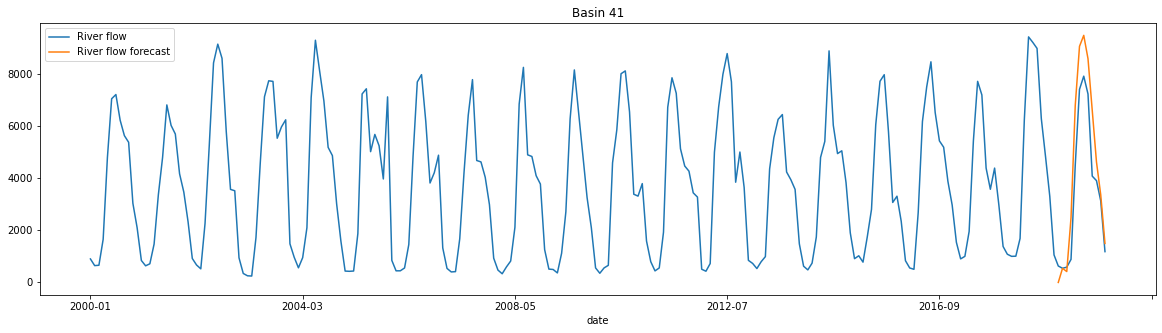

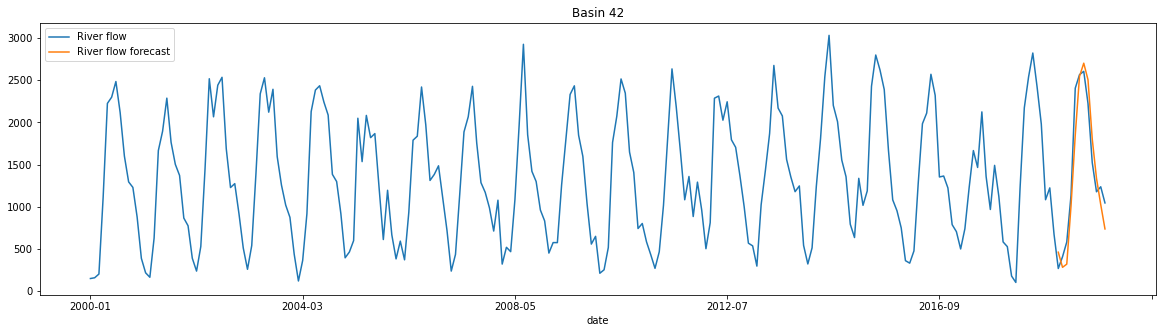

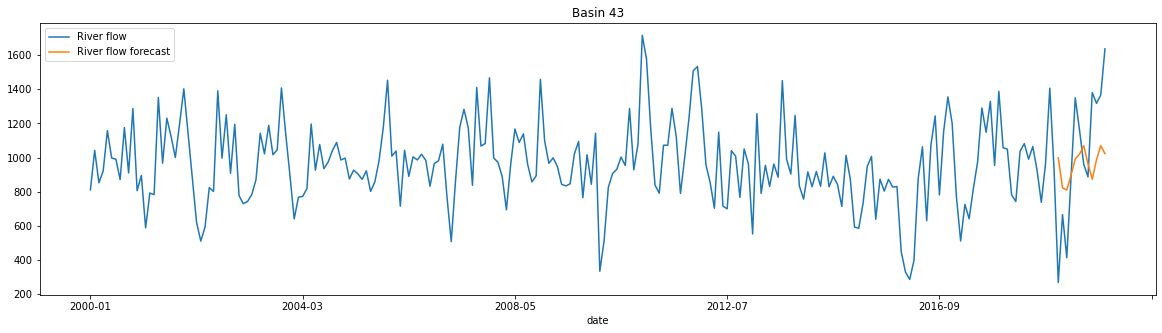

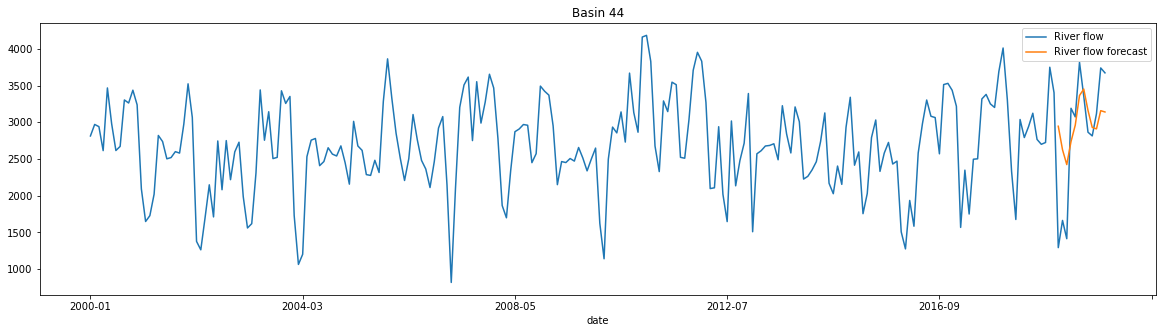

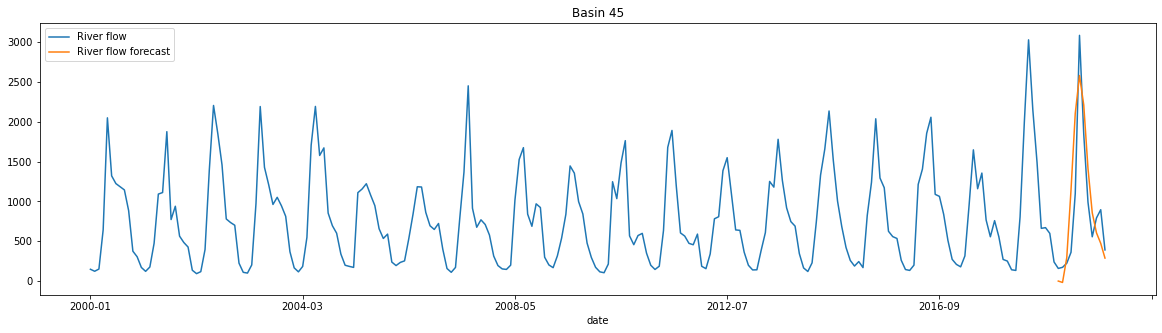

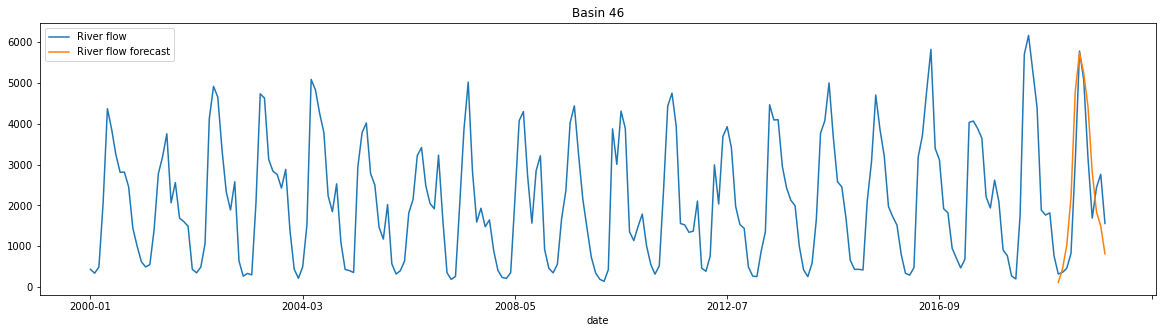

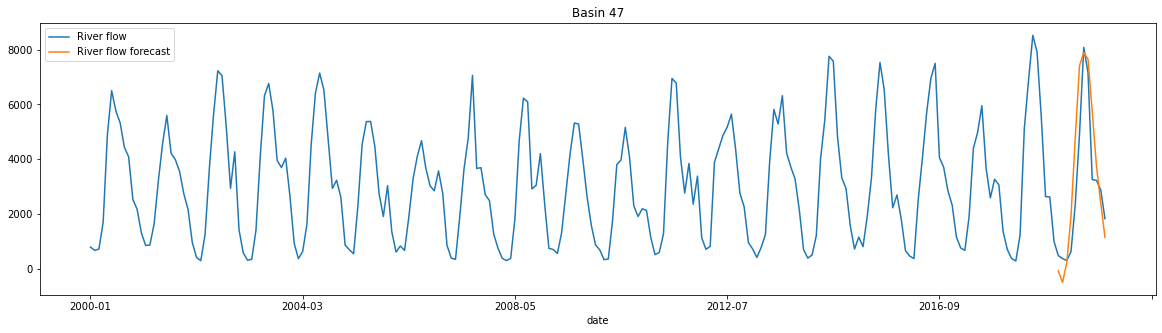

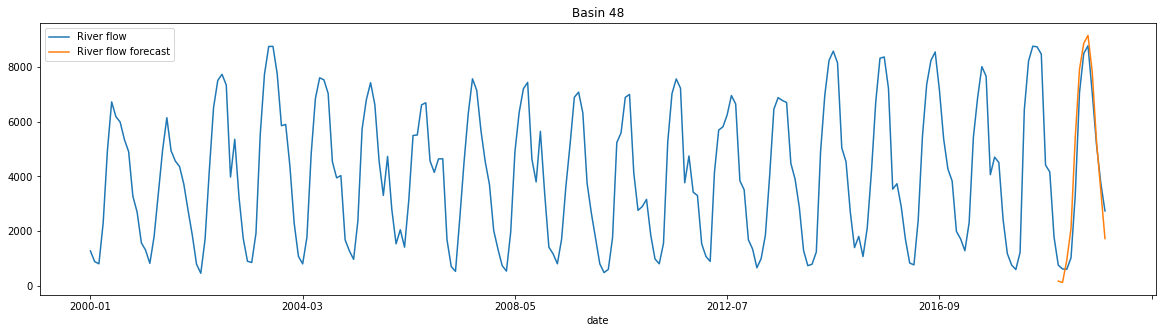

In [21]:
for i in range(len(list_df_plot)): 
    list_df_plot[i].plot(figsize=(20,5))
    plt.title("Basin " + str(i+1))

In [42]:
list_out = []
for i in range(len(mcs)):
    tmp = list_df_plot[i].copy()
    tmp['Basin'] = mcs[i]
    list_out.append(tmp)

df_out = pd.concat(list_out, axis=0)

In [43]:
df_out

River flow  River flow forecast  Basin
date                                            
2000-01     2.450000                  NaN      1
2000-02     2.140000                  NaN      1
2000-03     2.530000                  NaN      1
2000-04     2.380000                  NaN      1
2000-05     4.640000                  NaN      1
...              ...                  ...    ...
2019-08  8772.352875          9153.052615     48
2019-09  7051.413625          7816.077522     48
2019-10  5164.225750          5291.838803     48
2019-11  3775.500000          3496.618979     48
2019-12  2736.000000          1725.316079     48

[11520 rows x 3 columns]

In [45]:
df_out.to_csv(r'VAR_predictions.csv')